#  Programming for Data Analysis Project 2 - An analysis of paleo-present climate data

Author: Audrey Allen

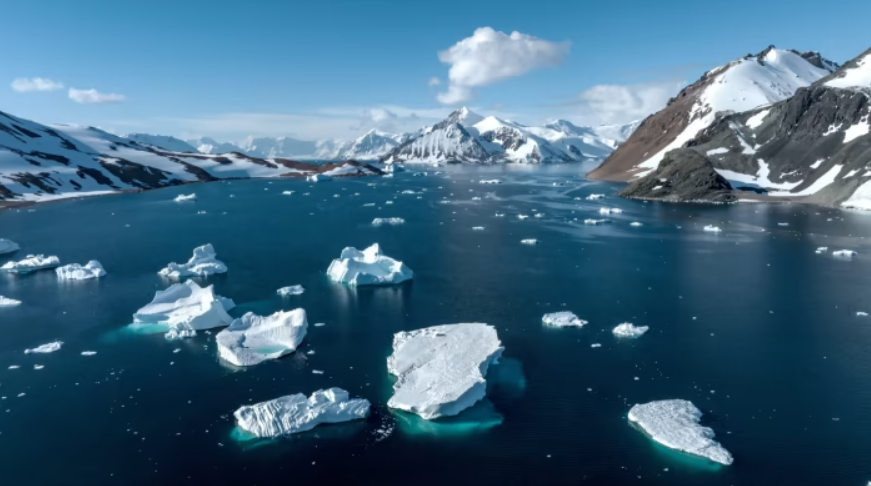


- Analyse CO2 vs Temperature Anomaly from 800kyrs – present

- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

- Examine Irish context:

- Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage)


Roughwork CO2 and Temperature Data

** Below I will firstly do my Roughwork for the temperature and CO2 file.**


In [ ]:
# Delete top number of rows from .txt file  and convert to .csv file

import pandas as pd


columns = ['Bag', 'ztop','Age','Deuterium', 'Temperature']

data = pd.read_csv('Roughwork_Temperature/NOAATemperature.txt', skiprows=92, delim_whitespace=True, names=columns, engine='python')

display(data)

df = data[['Age', 'Temperature']]

df.to_csv (r'Roughwork_Temperature/NOAATemperature.csv', index=None)


In [ ]:
# Read in Excel File - Temperature Data

#Calculate Average Temperature anomoly over the years

# Firstly extract two columns from Jousel dataset into a dataframe

# Also rename the age field


import pandas as pd
df = pd.read_excel('Roughwork_Temperature/Temperature Data - Jousel.xls')

display(df)

df1 = df.rename(columns=({'EDC3béta':'Age'}))

df2 = df1[['Age', 'temp']]

df2.to_csv (r'Roughwork_Temperature/TemperatureAnomoly.csv', index=None)



Calculate the temperature anomoly from the 800K years ago to now. Jouzels data only goes as far as the year 2000 so I sourced data from 2000 to 2022 from https://en.tutiempo.net/climate/ws-898280.html. This is temperature data from Dome C II in Antartica so from the same location as Jouzels data. 

However the average data per year is in degree celcius and there seems to be quite a significant difference when comparing Jouzels data and this dataset. This difference will be noticable from the year 2001 onwards. (After Jouzels data)

There is not average data for every year in this new Dome C dataset. I convert the average yearly temperature for Dome C from celcius to Kelvin as this is what Jouzel has measured his average temperature as.

In [ ]:
# Import DictWriter class from CSV module
import csv
 
# list of column names
field_names = ['Age', 'Temp']
 
# Below are the years and the values taken from Dome C II - Converted from celcius to Degrees Kelvin from intermittent years from 
# 2001 to 2022

values = [[-51,222.25],[-53,221.25],[-54,222.75],[-60,220.55],[-61,222.95],[-62,221.35],[-63,222.25],[-64,222.25],[-67,221.85], [-68,222.05],[-69,222.95],[-70,222.85],[-72,223.25]] 
     

with open('Roughwork_Temperature/TemperatureAnomoly.csv', 'a', newline="") as file:
   writer = csv.writer(file)    
   writer.writerows(values)

In [ ]:
# Want to sort the temperature data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork_Temperature/TemperatureAnomoly.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["Age"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 

In [ ]:
# And then I want to write to a the csv file again but this time the data will be sorted.

df = csvData

df.to_csv (r'Roughwork_Temperature/TemperatureAnomoly.csv', index=None)

In [ ]:
# The next piece of work is to get the temperature anomoly from 800K years to 2022
# I calculated the average temperature from  age -50 (2000) to 1000 approx 1000 years prior to that (989.8635)
# I then subtracted the average temperature for that period from the average temperature for that year (in kelvin)
# and that was the anomoly for that year
# As I mentioned above the anomoly is larger after 2001 as I have amalgamated two different datasets and even though it is for the 
# same location 'Antartica' there are noticable differences in temperature and therefore the anomoly looks larger after 2001.
# Just something to note - N.B. N.B.

from statistics import mean 

inp_lst = [218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	219.2,	220.4,	217.7,	217,	217.4,	217.4,	216.9,	218.2,	216.8,	216.3,	217.8,	217,	218.4,	217.7,	216.7,	216.2,	217.9,	215,	217.8,	218.2,	218.1,	217.4,	217.3,	216,	217.1,	217.6,	216.2,	217,	216.8,	217.4,	216.7,	216.5,	215.9,	216.9,	217.3,	217.6,	215.7,	217.6,	217.5,	216.8,	216.6,	217.8,	215,	216.5,	217,	218.7,	218.1,	216.6,	218.8,	216.5,	216.6,	218.9,	218.4,	217.7,	216.4,	216.8,	216.8,	216.9,	216.4,	216,	216.5,	217.3,	217.2,	217.7,	217.4,	218,	218.3,	218.6,	218.9,	216.4,	218,	216,	218.3,	216.4,	216.7,	216.9,	216.7,	217.8,	217,
] 
list_avg = mean(inp_lst) 

print("Average value of the list:\n") 
print(list_avg) 
print("Average value of the list with precision upto 3 decimal value:\n")
print(round(list_avg,3))




In [ ]:
# Now that I have got the average over 1000 years I need to subtract that value which is 217.39 from all of the average kelvin values 
# in Jouzels data and also my amalgamated data from Dome C - this will give me the temperature anomoly over this period.

# Again it is important to note there is a change when I amalgamate Jouzels dataset with the 
# Antartic Dome C dataset from 2001 onwards

df['Anomoly'] = df['temp']-217.39

df['Anomoly'] = df['Anomoly'].round(2)

display(df)

In [ ]:
# And then I want to write to a the csv file again but this time it will have the additional column for anomoly

df = csvData

df.drop('temp', inplace=True, axis=1) 

df = df.rename(columns=({'Age':'Year'}))

df.to_csv (r'Roughwork_Temperature/TemperatureAnomoly.csv', index=None)


In [ ]:
# The TemperatureAnomoly file is now ready to be plotted so I will copy into my Final Data folder

import shutil

source = r"Roughwork_Temperature/TemperatureAnomoly.csv"
target = r"FinalData/TemperatureAnomoly.csv"

# Export the  csv file to JSON

df.to_json (r'FinalData/TemperatureAnomoly.json')

shutil.copyfile(source, target)

# https://datatofish.com/copy-file-python/

** Now I will complete my Roughwork for the CO2 Data **

In [ ]:
# Read in Excel File and convert to csv- CO2 Data

import pandas as pd
import csv

# The data in this excel file is a review of an earlier file to correct an error that was made

# The data includes data from 800K years ago to 2001. I have sourced data from Mauna Loa which will cover the period from 2001
# to 2022

# I want to convert the excel file to csv format as it will be the same as the other files in the project and it is easier to view
# and use

  
# Read and store content 
# of an excel file  

import pandas as pd
df = pd.read_excel ('Roughwork_CO2/CO2 Data IPCC Report.xls', sheet_name='CO2 Composite', skiprows=range(14)) 


df.drop('sigma mean CO2 (ppmv)', inplace=True, axis=1) 
df.drop('Location', inplace=True, axis=1) 
df['Year'] = df['Year'].round(2)
df['CO2'] = df['CO2'].round(2)


display(df)


df.to_csv (r'Roughwork_CO2/CO2 Data IPCC Report.csv', index=None, header=True)

# show the dataframe 

df


# Reference: https://www.geeksforgeeks.org/convert-excel-to-csv-in-python/

In [ ]:
# Now I want to add in the Mauna Loa data into the .csv file

# Import DictWriter class from CSV module

import csv

 
# Below are the years and the CO2 values taken from Mauna Loa - from 2002 to 2022

values = [[-52,373.22],[-53,375.77],[-54,377.49],[-55,379.8],[-56,381.9],[-57,383.76],[-58,385.59],[-59,387.37],[-60,389.85], [-61,391.63],[-62,393.82],[-63,396.48],[-64,398.61],[-65,400.83],[-66,404.41],[-68,408.72],[-69,411.65] ,[-70,414.21],[-71,416.41] ,[-72,418.53]] 


with open('Roughwork_CO2/CO2 Data IPCC Report.csv', 'a', newline="") as file:
   writer = csv.writer(file)    
   writer.writerows(values)



In [ ]:
# Want to sort the Co2 data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork_CO2/CO2 Data IPCC Report.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["Year"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 

In [ ]:
# And then I want to write to a the csv file again but this time the data will be sorted.

dfCO2 = csvData

dfCO2.to_csv (r'Roughwork_CO2/CO2 Data IPCC Report.csv', index=None)

In [ ]:
# The CO2 file is now ready to be plotted so I will copy into my Final Data folder

import shutil

source = r"Roughwork_CO2/CO2 Data IPCC Report.csv"
target = r"FinalData/CO2 Data IPCC Report.csv"

dfCO2.to_json (r'FinalData/CO2 Data IPCC Report.json')

shutil.copyfile(source, target)

# https://datatofish.com/copy-file-python/


### 1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present - Plot

Overview of the Datasets

In [ ]:
### Read in two datafiles

# Firstly we are going to look at both of the files

# I am going to firstly plot the temperature data

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

TemperatureData  = pd.read_csv('FinalData/TemperatureAnomoly.csv')

fig, ax = plt.subplots()

# I also want to invert the x-axis

# Years (BP) - Where period is 1950
TemperatureData.plot(x="Year", y="Anomoly", ax=ax, label='Temp Anomoly',color='red')


# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("Temperature Anomoly")
plt.grid(True)
plt.savefig('Images/Temperature Anomoly.png') # Save to PNG file
plt.show()





In [ ]:
### Read in two datafiles

# Firstly we are going to look at both of the files

# I am going to firstly plot the CO2 data

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

CO2Data  = pd.read_csv('FinalData/CO2 Data IPCC Report.csv')

fig, ax = plt.subplots()




# I also want to invert the x-axis

# Years (BP) - Where period is 1950

CO2Data.plot(x="Year", y="CO2", ax=ax, label='CO2 PPM',color='blue')

# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("CO2 Measurements last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("CO2 PPM")
plt.grid(True)
plt.savefig('Images/CO2.png') # Save to PNG file
plt.show()


In [ ]:
# Plot both temperature and CO2 on the same plot

import matplotlib.pyplot as plt
# Data points of line 1


CO2 = pd.read_csv('FinalData/CO2 Data IPCC Report.csv', header = 0, index_col = 0,
                         parse_dates=True)
Temp = pd.read_csv('FinalData/TemperatureAnomoly.csv', header = 0, index_col = 0,
                       parse_dates=True)

# plot both overlayed
# I also want to invert the x-axis


SummaryTemp = TemperatureData.describe()

print (SummaryTemp) # To get min and max temperature - As I am amalgamating the data from 2000 onwards there is a larger spike or 
# anomoly than expected but the trend is similar to other graphs online in regards to CO2 and temperature. 

SummaryCO2 = CO2Data.describe()

print (SummaryCO2)

ax = Temp.plot(figsize=(10,10))
ax3 = ax.twinx()  
ax3.plot(-9.49,5.86)   # Get minimum and maximum temperature anomoly  - Ranges from -9.49 - 5.86  
ax.invert_xaxis()
plt.title("CO2 Measurements and Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("CO2 PPM")
plt.grid(True)
#ax3.yaxis.tick_right() 
CO2.plot(ax=ax3)
plt.savefig('Images/CO2andTemp.png') # Save to PNG file



In [ ]:
# I am going to analyse the difference between NOAA's temperature anomoly over the past 800K years and my calculated temperature 
# anomoly

JouzelAnomoly = pd.read_csv('Roughwork_Temperature/NOAATemperature.csv', header = 0)

JouzelAnomoly = JouzelAnomoly.describe()

print(JouzelAnomoly)

print(SummaryTemp)


In [ ]:
# Output the temperature column to a list

JouzelTemp = JouzelAnomoly['Temperature'].tolist()

print(JouzelTemp)

In [ ]:
CO2Data1 = CO2Data['CO2'].tolist()

print(CO2Data1)

### Analysis - CO2 and Temperature

The CO2 data has been sourced from the composite data from the IPCC report. This data spans from approximately 805K years ago to -50 years BP. BP stands for before present. Present meaning 1950. The 'present' in BP is set at 1950, as this was close to when radiometric dating began to be used. 

The overall analysis of the CO2 and temperature data shows us that the levels of CO2 have been rising consistently over the past 800K years and in conjunction with that the temperature has also been on the rise. There have been 5 or 6 major ice ages since the earths 4.5 billion year history. The dips in the blue line above show us these dips in temperature anomoly. The temperature anomoly is the difference between the temperature over a given period (In this case 1000 years) and then subtracted from the actual average temperature for that particular year.

Analysing the summary data from the NOAA anomoly record and my temperature anomoly record there are differences beween the mean, standard deviation, minimum, maximum, 25%, 50% and 75% but they are not huge. I have more records in my datafile as I amalgamated data from Dome C in Antartica to retrieve the data from 2001 onwards. As I have mentioned previously this data seems to be quite different from Jouzels temperature data. From the year 2000 to 2001 there is a increase in temperature anomoly from 0.91 to 4.86 which is a difference of 3.95. The data seems skewed here so caution is to be advised if using this for analytic purposes. (Even though the data has been sourced from the same geographical area)

It is obvious from the graphs above that there is a strong correlation between the rise of C02 and the rise in temperature over the past 800K years or so. There has been 5/6 major ice ages and this is obvious too from the dips in temperature and CO2 also.

I am going to discuss the CO2 data and the temperature data under the below headings.

### Temporal Lead and Lag Analysis (Cause and Effect)

Temporal data is data that represents a state in time. Temporal data is collected to analyze environmental variables such as CO2 and temperature changes. Historically, temperature and CO2 have followed similar patterns because the heating or cooling of Earth's surface can lead to changes in the concentrations of greenhouse gases in the atmosphere, which can then cause additional warming or cooling.

Lead and Lag analysis is used to shift one variable ahead or back in time so that the movements of two variables are more closely aligned if there is a time lag between a change in one variable and its impact on another. 

We can see from the graph of the two variables that for the most part they both rise and fall together. However looking at lead and lag analysis it looks as if the rise in CO2 emissions lags behind the rise in temperature which discounts the whole point that a rise in CO2 emissions is causing the earth to become warmer. However, based on Antarctic ice core data, changes in CO2 follow changes in temperatures by about 600 to 1000 years. (chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://gml.noaa.gov/outreach/info_activities/pdfs/PSA_co2_and_temperature.pdf). This temperature lead is very noticable in the early years. 

The early changes in temperature is explained by the earths orbit around the sun all those years ago, which affects the amount of sunlight reaching the Earths surface. In regards to warming and the lag between temperature and CO2 this happened because as Ocean temperatures rise, CO2 is released from the Oceans into the atmosphere. This causes the temperature to increase which we can see from the graph back as far as 800 thousand years ago. CO2 is therefore both the cause and effect of Global warming. 

Changes in the orbital cycle caused the intial warming but 90% of glacial-interglacial warming occured after that period. It is obvious from the graph that there is a stronger correlation between the rise of temperature and the rise of CO2 emissions as the years go on. From about 400 thousand years BP there looks to be a strong correlation.

In [ ]:
# Temporal Lead and Lag Analysis (Cause and Effect) - 
# Using the scipy cross correlation method can give us an idea of the lag between CO2 and temperature data


import numpy as np
from scipy import signal
x = JouzelTemp
y = CO2Data1
correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

print(lag)

# https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation

In [ ]:
# We can calculate the cross correlation for every lag between
# the two time series by using the ccf() function from the statsmodels package as follows:


import statsmodels.api as sm
import seaborn as sns

#calculate cross correlation
test = sm.tsa.stattools.ccf(JouzelTemp, CO2Data1, adjusted=False)

print(test)

# Need to convert the array into a pandas dataframe in order to export to csv file 

dftocsvcorrelation = pd.DataFrame(test)

print(dftocsvcorrelation)

dftocsvcorrelation.to_csv (r'Roughwork_CO2/dftocsvcorrelation.csv', index=None)

#Reference for the statsmordels.api
# https://www.statology.org/cross-correlation-in-python/

In [ ]:
# Want to sort the temperature and CO2 correlation matrix data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvDatacorr = pandasForSortingCSV.read_csv("Roughwork_CO2/dftocsvcorrelation.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvDatacorr.sort_values(["0"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvDatacorr) 

In [ ]:
# And then I want to write to a the csv file again but this time the data will be sorted.

# I want to get the max postive correlation coefficient to see what the lag is (for Y (temperature behind X))

dfCO2corr = csvDatacorr

dfCO2corr.to_csv (r'Roughwork_CO2/dftocsvcorrelationSorted.csv', index=None)

In [ ]:
# The statsmodels ccf function only produces forward lags, so in order to produce both forward and backward lags 
# is to reverse the order of both the input series and the ouput 

backwardsCO2 = sm.tsa.stattools.ccf(JouzelTemp[::-1], CO2Data1[::-1], adjusted=False)[::-1]
forwardsCO2 = sm.tsa.stattools.ccf(JouzelTemp, CO2Data1, adjusted=False)
ccfco2_output = np.r_[backwardsCO2[:-1], forwardsCO2]

# Need to convert the array into a pandas dataframe in order to export to csv file 

dfCO2Tempcorrelation = pd.DataFrame(ccfco2_output)

print(dfCO2Tempcorrelation)

dfCO2Tempcorrelation.to_csv (r'Roughwork_CO2/dfCO2Tempcorrelation.csv', index=None)

# https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library


In [ ]:
import matplotlib.pylab as plt

plt.stem(range(-len(ccfco2_output)//2, len(ccfco2_output)//2), ccfco2_output)
plt.xlabel('Lag')
plt.ylabel('ACF')
# 95% UCL / LCL - Upper Confidence and lower confidence level
plt.axhline(-0.5/np.sqrt(len(test)), color='k', ls='--') 
plt.axhline(0.5/np.sqrt(len(test)), color='k', ls='--')

In [ ]:
# Another way of plotting the lag between temperature and CO2 is below

full = (pd.DataFrame({'value':np.concatenate([backwardsCO2, forwardsCO2[1:]])})
          .assign(lag=lambda x: x.index - len(backwardsCO2) )
       )


plt.figure(figsize=(20,50))
full.plot(x='lag')

# https://stackoverflow.com/questions/69968668/cross-correlation-plot-in-statsmodels

### Interpretation of Cross Correlation between CO2 and Temperature

By reviewing the correlation of the two variables I can see that there is more of a stronger correlation between the rise in temperature and the rise of CO2 emissions as the years and centuries pass by. The two columns of values are of unequal length so this may skew the result slightly. 

What Is Considered a Strong Correlation Coefficient?

Generally, the closer a correlation coefficient is to 1.0 (or -1.0) the stronger the relationship between the two variables is said to be. While there is no clear boundary to what makes a "strong" correlation, a coefficient above 0.75 (or below -0.75) is considered a high degree of correlation, while one between -0.3 and 0.3 is a sign of weak or no correlation. 

The last few values have a negative correlation and this could be because I have amalgamated the temperature anomoly data from 2000 onwards and again this has skewed my data slighlty.

Reference https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp#:~:text=While%20there%20is%20no%20clear,of%20weak%20or%20no%20correlation.

To simply explain the two plots above. Cross-correlation is a measure of similarity of two series as a function of the displacement of one relative to the other. https://en.wikipedia.org/wiki/Cross-correlation

 The coefficient values on the left of zero are those where X leads and Y lags while the ones on the right are when Y leads and X lags. (at Lag 0) 

The highest positive correlation coefficient is +0.3542. From the graph above it looks like this happened at the -1200 lag (Approximately), which is equivalent to lagging variable X 1200 years behind Y.  To interpret this, we would say there is a weak positive correlation between the rise in CO2 and the rise in temperature 1200 years later.

https://www.datainsightonline.com/post/cross-correlation-with-two-time-series-in-python#:~:text=Interpretation%20and%20Further%20Steps&text=The%20coefficient%20values%20on%20the,blue%20line)%20is%20%2B0.32


### Frequency Analysis - CO2 and Temperature

Frequency analysis is used to predict how often certain values of a variable phenomenon may occur and to assess the reliability of the prediction.

For frequncy I will perform Fast Fourier Analysis. 

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT).

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In mathematics, the discrete Fourier transform converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform, which is a complex-valued function of frequency.

https://en.wikipedia.org/wiki/Discrete_Fourier_transform

To understand the components more i.e. temperature and CO2 over time I will convert the time series to a frequency domain as it may be easier to understand once it is Fourier transformed.



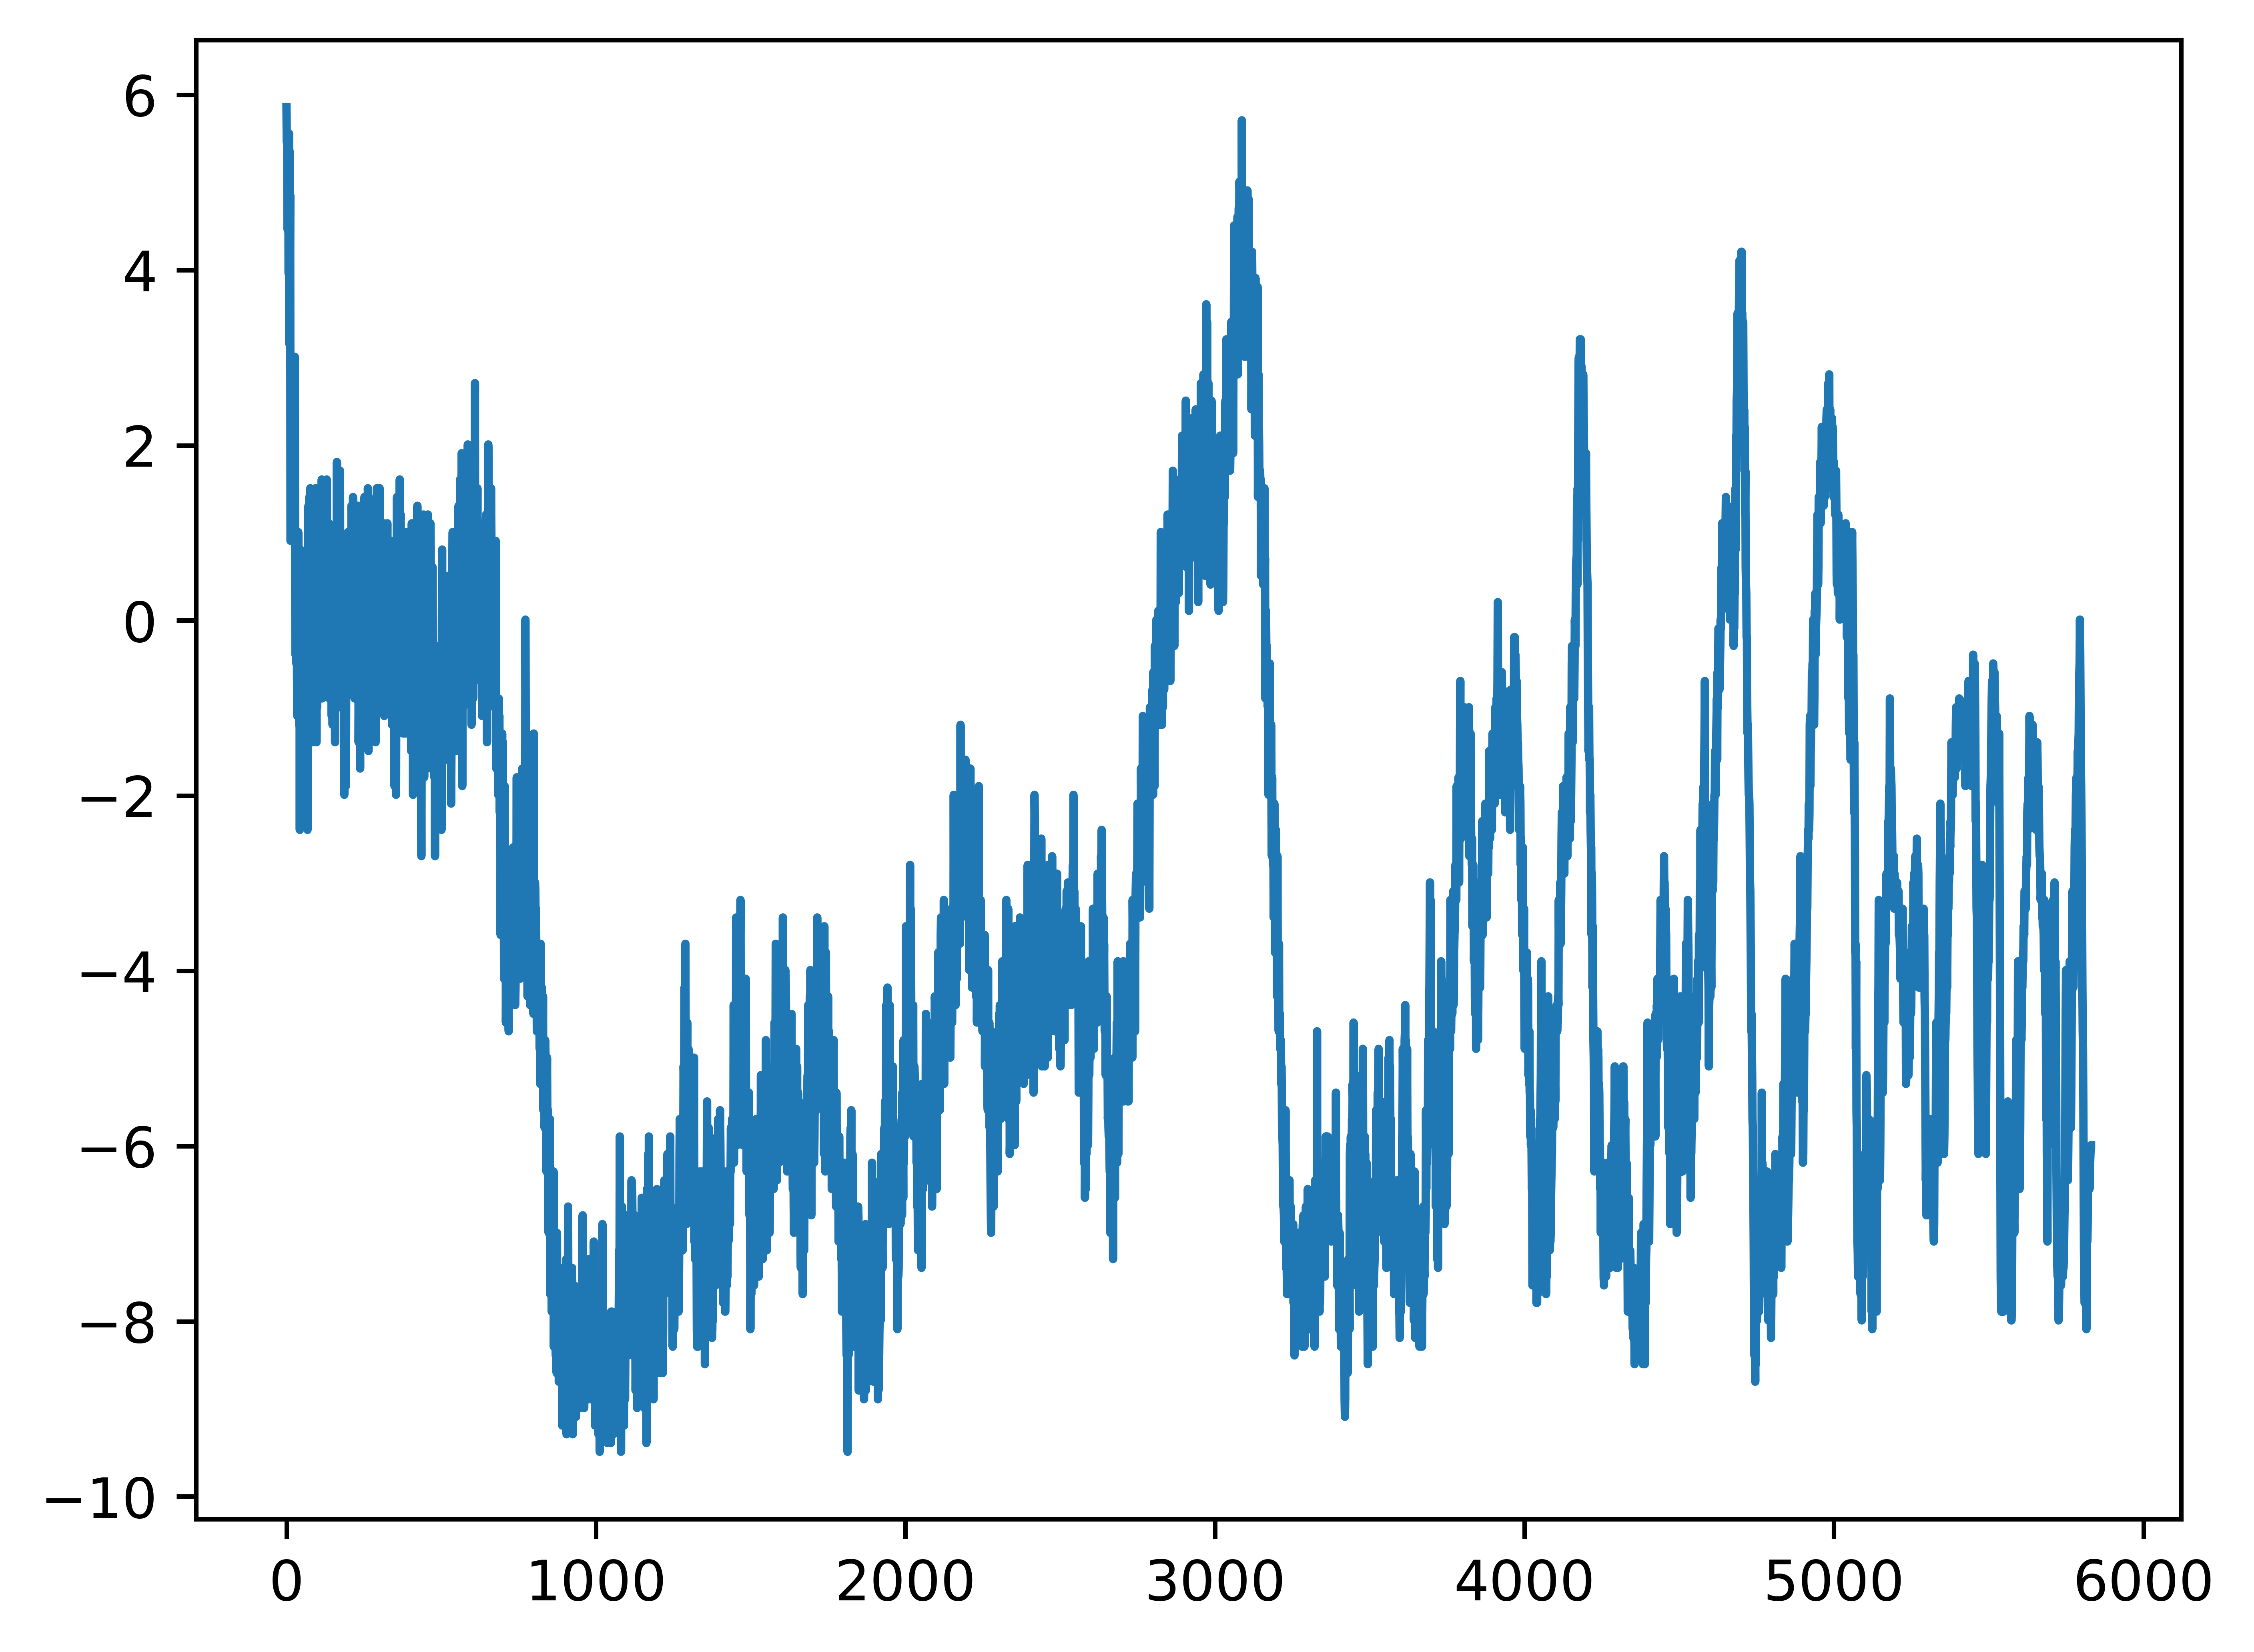

c:\Users\audreyallen\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


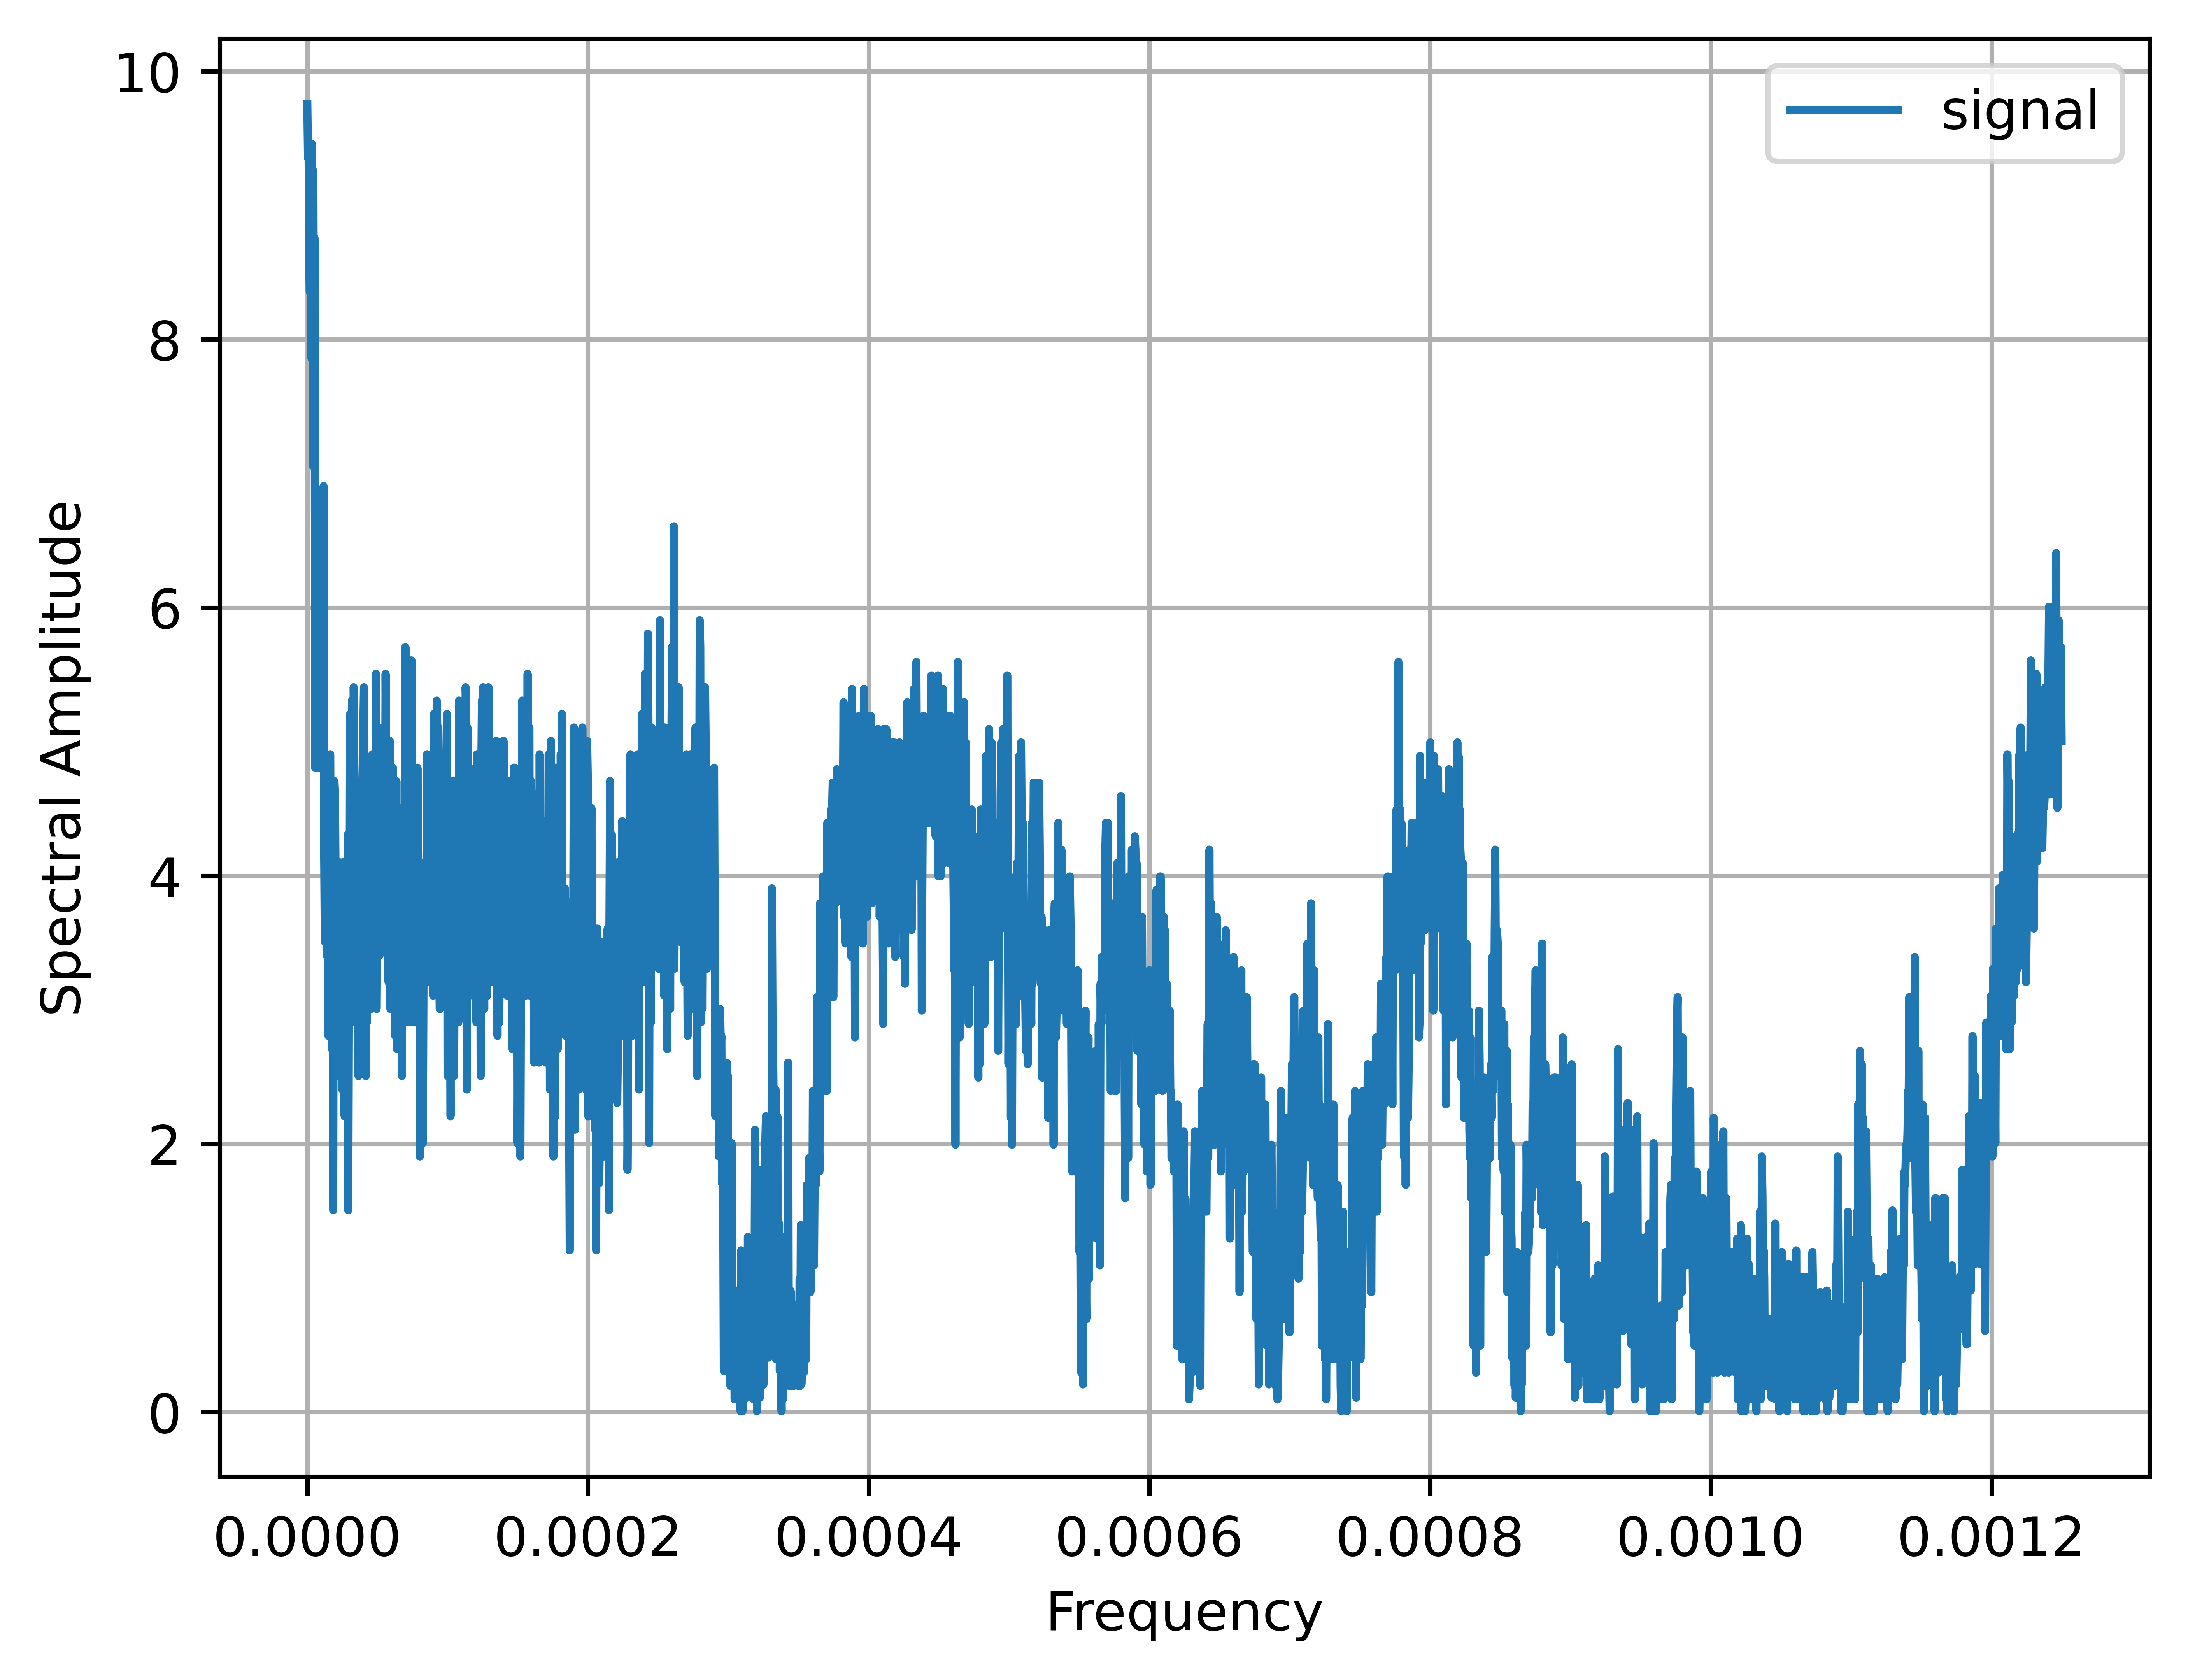

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from scipy.fft import fft

plt.rcParams['figure.dpi'] = 1000

# load the dataset #1
dataframe = read_csv('FinalData/TemperatureAnomoly.csv', usecols=[1]) # Use anomoly variable

plt.plot(dataframe)
plt.show()

N = dataframe.shape[0] #number of elements
################ FFT Con scipy
#sampling period
T = 400
#create x-axis for time length of signal
x = np.linspace(0, N*T, N)
#create array that corresponds to values in signal
y = dataframe
y = y - np.mean(y)
#perform FFT on signal
yf = fft(y)
#create new x-axis: frequency from signal
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#plot results
plt.plot(xf, abs(yf[0:N//2]), label = 'signal for temperature')
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Spectral Amplitude')
plt.legend(loc=1)
plt.savefig('Images/fftTemp.jpg')
plt.show()


#https://stackoverflow.com/questions/76729203/computing-fast-fourier-transform-of-dataset-using-python

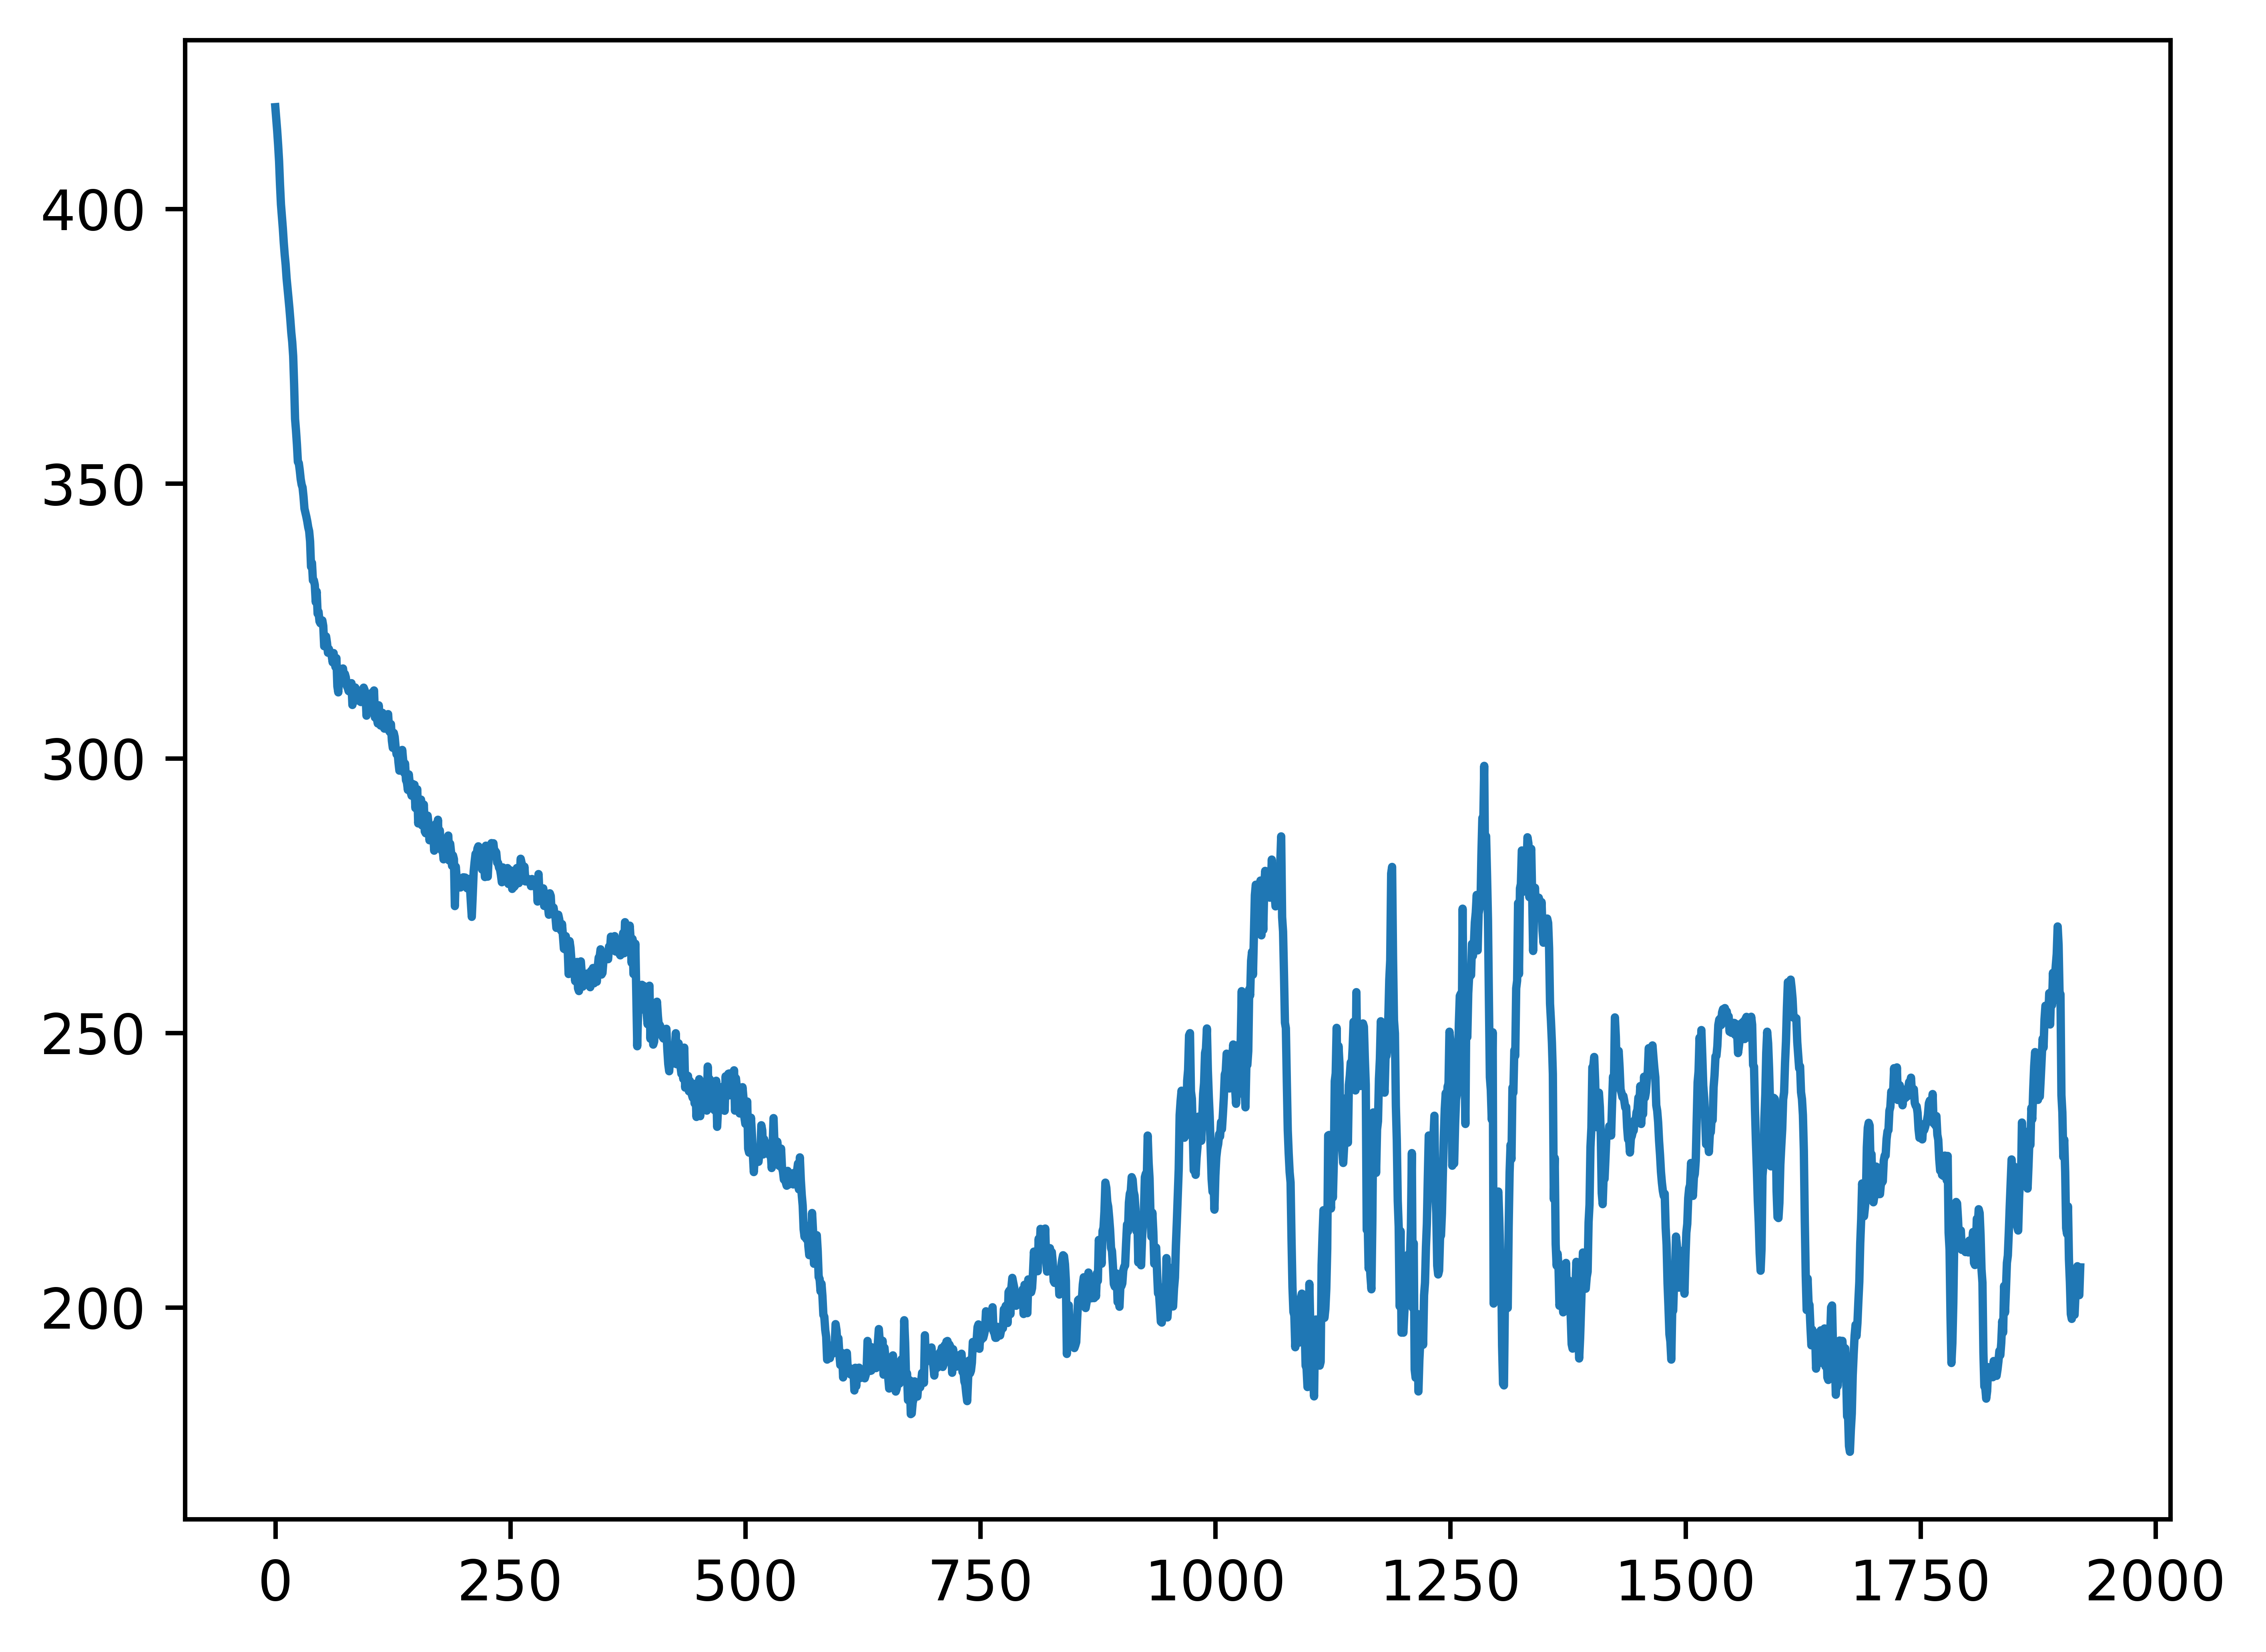

c:\Users\audreyallen\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


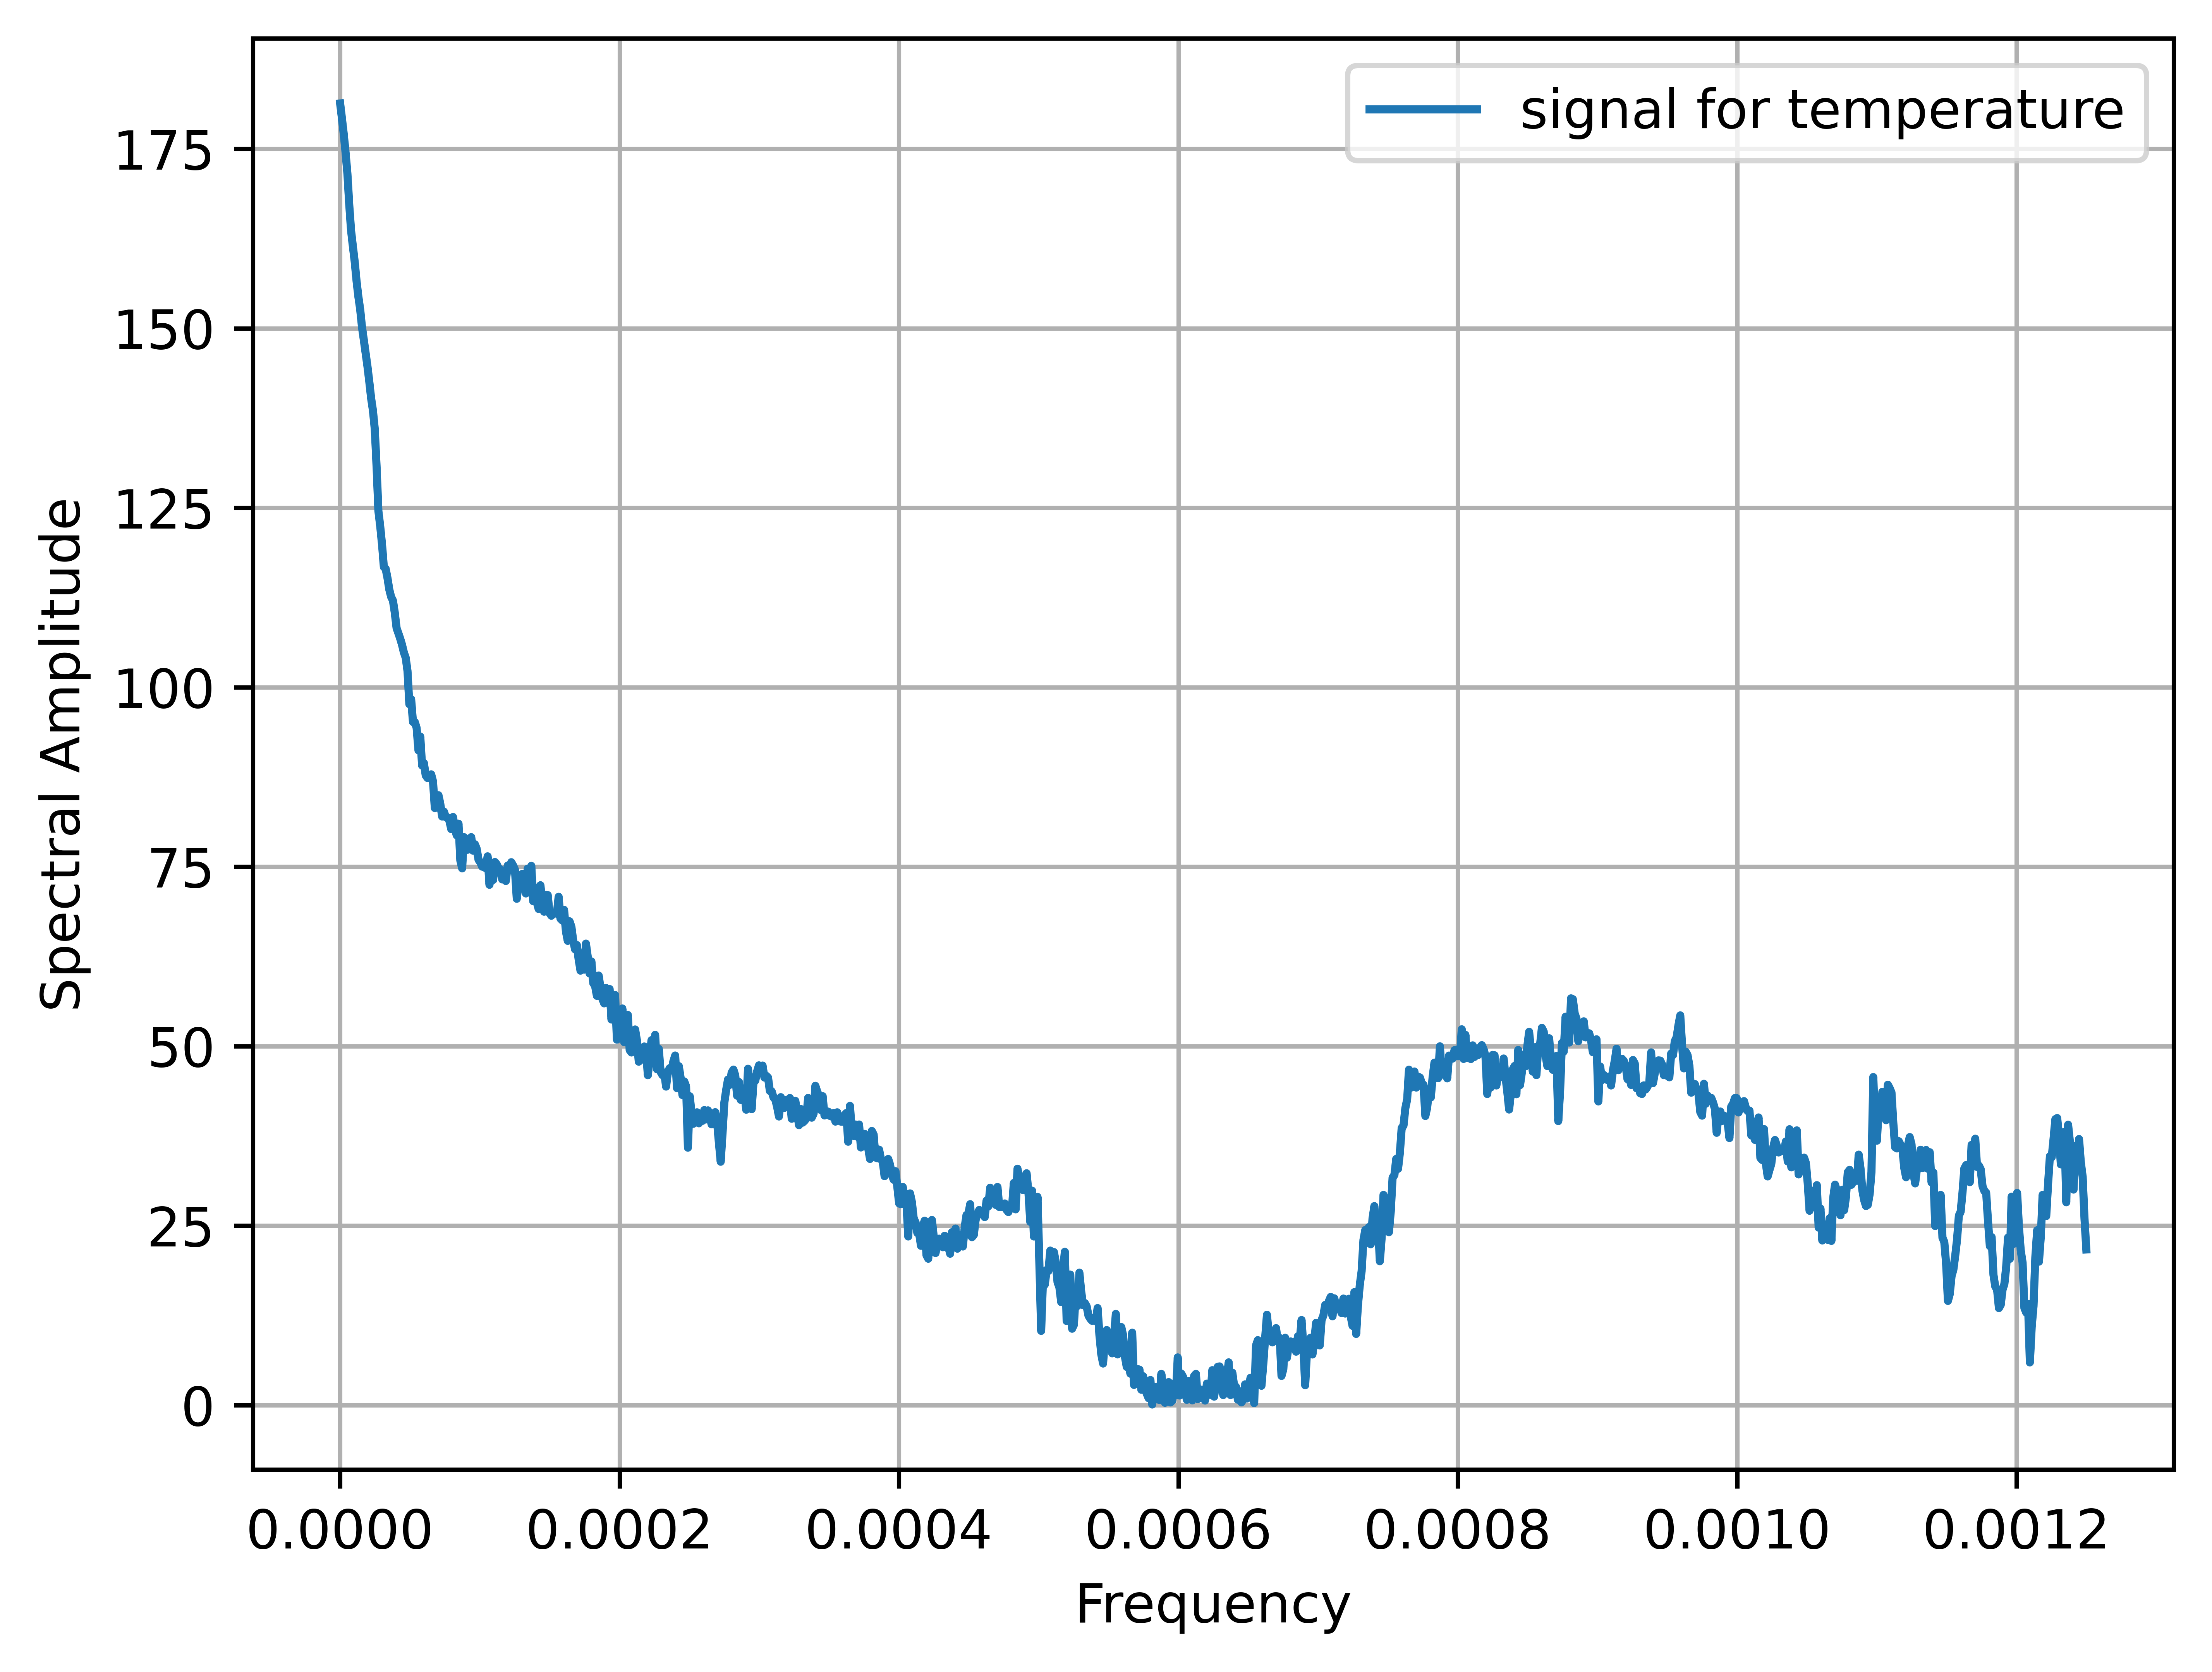

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from scipy.fft import fft

plt.rcParams['figure.dpi'] = 1000

# load the dataset #1
dataframe = read_csv('FinalData/CO2 Data IPCC Report.csv', usecols=[1]) # Use anomoly variable

plt.plot(dataframe)
plt.show()

N = dataframe.shape[0] #number of elements
################ FFT Con scipy
#sampling period
T = 400
#create x-axis for time length of signal
x = np.linspace(0, N*T, N)
#create array that corresponds to values in signal
y = dataframe
y = y - np.mean(y)
#perform FFT on signal
yf = fft(y)
#create new x-axis: frequency from signal
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#plot results
plt.plot(xf, abs(yf[0:N//2]), label = 'signal for CO2')
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Spectral Amplitude')
plt.legend(loc=1)
plt.savefig('Images/fftCO2.jpg')
plt.show()


#https://stackoverflow.com/questions/76729203/computing-fast-fourier-transform-of-dataset-using-python

From analysing the Frequency graph above it is obvious that the FFT has changed the domain of the X-axis from time (YBP) to frequency. The FFT would be expected with such a large sample of data there are peaks and troughs which show the complexity and differences within the data. 

The Fourier Transform takes a time-based pattern, measures every possible cycle, and returns the overall "cycle recipe" (the amplitude, offset, & rotation speed for every cycle that was found). https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/



### 2. Analyse CH4 vs Temperature Anomaly from 800kyrs – present

As I have analysed the rise in CO2 and the rise in temperature over the past 800K years so I am also going to do analysis on the rise of CH4 or Methane Vs temperature also. The Methane data that I have sourced is from EPICA Dome C Ice Core 800KYr. Dome C is located at Antartica. Atmospheric methane is an important greenhouse gas and a sensitive indicator of climate change and millennial-scale temperature variability. This dataset provides a detailed atmospheric methane record from the EPICA Dome C 
ice core that extends the history of this greenhouse gas to 800,000 yr before present. (BP is defined as previously stated as 1950).

DESCRIPTION:   
Methane record from the EPICA (European Project for Ice Coring in Antarctica) 
Dome C ice core covering 0 to 800 kyr BP.  The air from polar ice-core samples 
of about 40g (Bern) and 50g (LGGE) is extracted with a melt-refreezing method 
under vacuum, and the extracted gas is then analysed for CH4 by gas chromatography. 
Two standard gases (408 p.p.b.v. CH4, 1,050 p.p.b.v. CH4) were used at Bern 
and one (499 p.p.b.v. CH4) at LGGE, to calibrate the gas chromatographs. 
The mean CH4 analytical uncertainty (1s) is 10 p.p.b.v.

Reference: 
https://www.ncei.noaa.gov/access/paleo-search/cvterms?termId=967

The Dome C data goes as far as 13 BP (1937). BP or before Period is 1950. 

I have sourced the mid-1900's methane data from https://www.eea.europa.eu/data-and-maps/daviz/atmospheric-concentration-of-carbon-dioxide-5#tab-chart_5_filters=%7B%22rowFilters%22%3A%7B%7D%3B%22columnFilters%22%3A%7B%22pre_config_polutant%22%3A%5B%22CH4%20(ppb)%22%5D%7D%7D. This data is contained in Methane_Mid1900.txt.

I have sourced the later CH4 data from https://sealevel.info/ch4.html. This data goes from 1984 to 2022 (Data is provisional). 

Methane or CH₄ is measured in parts per billion (ppb).

I will amalgamate these 3 data files and analyse the rise in methane over the past 800 thousand years with the rise in temperature.

Roughwork CH4 and Temperature Data

** Below I will firstly do my Roughwork for the temperature and CH4 (Methane) file.**

In [209]:
# Firstly I need to delete top number of rows from .txt file  and convert to .csv file
# I am going to look at the Methane_Raw_Early.txt and export to csv

import pandas as pd

columns = ['Depth', 'GasAge','CH4mean','1s', 'Lab']

data = pd.read_csv('Roughwork_Methane/Methane_Raw_Early.txt', skiprows=154, delim_whitespace=True, names=columns, engine='python')

display(data)

df = data[['GasAge', 'CH4mean']]

df.to_csv (r'Roughwork_Methane/Methane.csv', index=None)

Depth  GasAge  CH4mean    1s Lab
0       99.34      13      907  10.0   b
1      102.45     126      784  10.0   g
2      102.58     130      762  10.0   b
3      103.34     151      710  10.0   g
4      104.33     184      727  10.0   g
...       ...     ...      ...   ...  ..
2098  3188.08  794938      428  10.0   g
2099  3188.95  796320      418  10.0   b
2100  3189.43  797277      396  10.0   g
2101  3190.03  798417      458  10.0   g
2102  3190.53  799396      399  10.0   g

[2103 rows x 5 columns]

In [210]:
# Next I need to add in the values from the Methane_Mid1900.txt

# Import DictWriter class from CSV module
import csv
 
# list of column names
field_names = ['GasAge', 'CH4mean']
 
# Below are the values taken from https://www.eea.europa.eu/ which has given me the mean CH4 data from 1940 to 1983
# I will keep the years in the same format years before present
# A minus value indicates that the year is after 1950

values = [[10,1102.4],[5,1128.83],[0,1161.73],[-5,1207.03],[-10,1262.97],[-15,1328.47],[-20,1403.19],[-25,1483.57],[-28,1532.77], [-29,1549.53],[-30,1566.28],[-32,1600.69],[-33,1617.89]] 
     

with open('Roughwork_Methane/Methane.csv', 'a', newline="") as file:
   writer = csv.writer(file)    
   writer.writerows(values)


In [211]:
# Want to sort the CH4 data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork_Methane/Methane.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["GasAge"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 


Before sorting:
      GasAge  CH4mean
0         13   907.00
1        126   784.00
2        130   762.00
3        151   710.00
4        184   727.00
...      ...      ...
2111     -28  1532.77
2112     -29  1549.53
2113     -30  1566.28
2114     -32  1600.69
2115     -33  1617.89

[2116 rows x 2 columns]

After sorting:
      GasAge  CH4mean
2115     -33  1617.89
2114     -32  1600.69
2113     -30  1566.28
2112     -29  1549.53
2111     -28  1532.77
...      ...      ...
2098  794938   428.00
2099  796320   418.00
2100  797277   396.00
2101  798417   458.00
2102  799396   399.00

[2116 rows x 2 columns]


In [212]:
# And then I want to write to a the csv file again but this time the data will be sorted.
# CH4 data needs to be sorted

dfCH4 = csvData

dfCH4.to_csv (r'Roughwork_Methane/Methane.csv', index=None)

In [213]:
# The last piece of the CH4 data is taken from the gml.noaa.gov/ccgg/trends/ website (Mauna Loa data)
# Again the data is in .txt format so I need to convert this into .csv format

# Firstly I need to delete top number of rows from .txt file  and convert to .csv file
# I am going to look at the Methane_Raw_1984Onwards.txt and export to csv

import pandas as pd

columns = ['year', 'mean','unc']

data = pd.read_csv('Roughwork_Methane/Methane_Raw_1984Onwards.txt', skiprows=46, delim_whitespace=True, names=columns, engine='python')

display(data)

df = data[['year', 'mean']]

df.to_csv (r'Roughwork_Methane/Methane_1984_Onwards.csv', index=None)

year     mean   unc
0   1984  1644.85  0.67
1   1985  1657.29  0.59
2   1986  1670.09  0.74
3   1987  1682.70  0.49
4   1988  1693.28  0.67
5   1989  1704.53  0.55
6   1990  1714.43  0.68
7   1991  1724.78  0.72
8   1992  1735.47  0.57
9   1993  1736.53  0.46
10  1994  1742.07  0.58
11  1995  1748.88  0.48
12  1996  1751.28  0.68
13  1997  1754.48  0.42
14  1998  1765.54  0.64
15  1999  1772.33  0.64
16  2000  1773.22  0.81
17  2001  1771.22  0.59
18  2002  1772.66  0.55
19  2003  1777.33  0.50
20  2004  1777.05  0.50
21  2005  1774.16  0.64
22  2006  1774.94  0.56
23  2007  1781.38  0.63
24  2008  1787.01  0.77
25  2009  1793.52  0.69
26  2010  1798.91  0.73
27  2011  1803.14  0.63
28  2012  1808.12  0.63
29  2013  1813.43  0.66
30  2014  1822.53  0.53
31  2015  1834.26  0.55
32  2016  1843.12  0.68
33  2017  1849.58  0.64
34  2018  1857.33  0.82
35  2019  1866.58  0.60
36  2020  1878.93  0.56
37  2021  1895.28  0.55
38  2022  1911.83  0.78

In [214]:
# I need to upate the year values in Methane_1984_Onwards.csv to Years (BP) - so I need to subtract the year in my csv file from 
# 1950 and update the csv file
# Then I will amalgamate the two csv files together


# importing the pandas library 
import pandas as pd 
  
# reading the csv file 
df = pd.read_csv("Roughwork_Methane/Methane_1984_Onwards.csv") 
#df.rename(columns={"year" : "GasAge"}, inplace=True)


# updating the column value/data 
df.rename(columns={"year" : "GasAge"}, inplace=True)
df.rename(columns={"mean" : "CH4mean"}, inplace=True)
df.loc[:, 'GasAge'] = 1950 - df['GasAge'].round(2)
  
# writing into the file 
df.to_csv("Roughwork_Methane/Methane_1984_Onwards.csv", index=False) 
  

print(df) 


    GasAge  CH4mean
0      -34  1644.85
1      -35  1657.29
2      -36  1670.09
3      -37  1682.70
4      -38  1693.28
5      -39  1704.53
6      -40  1714.43
7      -41  1724.78
8      -42  1735.47
9      -43  1736.53
10     -44  1742.07
11     -45  1748.88
12     -46  1751.28
13     -47  1754.48
14     -48  1765.54
15     -49  1772.33
16     -50  1773.22
17     -51  1771.22
18     -52  1772.66
19     -53  1777.33
20     -54  1777.05
21     -55  1774.16
22     -56  1774.94
23     -57  1781.38
24     -58  1787.01
25     -59  1793.52
26     -60  1798.91
27     -61  1803.14
28     -62  1808.12
29     -63  1813.43
30     -64  1822.53
31     -65  1834.26
32     -66  1843.12
33     -67  1849.58
34     -68  1857.33
35     -69  1866.58
36     -70  1878.93
37     -71  1895.28
38     -72  1911.83


In [215]:
# Now I need to merge both csv files together
# 1. Methane.csv 
# 2. Methane_1984_Onwards.csv

import pandas as pd

# Read both CSV files into dataframes

df1 = pd.read_csv('Roughwork_Methane/Methane.csv')
df2 = pd.read_csv('Roughwork_Methane/Methane_1984_Onwards.csv')

pd.concat([df1, df2]).to_csv('Roughwork_Methane/Methane.csv', index=False)


In [216]:
# Now lastly I need to sort the Methane csv file ascending and copy into my FinalData folder

# Want to sort the CH4 data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork_Methane/Methane.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["GasAge"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 


# And then I want to write to a the csv file again but this time the data will be sorted.
# CH4 data needs to be sorted

dfCH4 = csvData

dfCH4.to_csv (r'Roughwork_Methane/Methane.csv', index=None)


Before sorting:
      GasAge  CH4mean
0        -33  1617.89
1        -32  1600.69
2        -30  1566.28
3        -29  1549.53
4        -28  1532.77
...      ...      ...
2150     -68  1857.33
2151     -69  1866.58
2152     -70  1878.93
2153     -71  1895.28
2154     -72  1911.83

[2155 rows x 2 columns]

After sorting:
      GasAge  CH4mean
2154     -72  1911.83
2153     -71  1895.28
2152     -70  1878.93
2151     -69  1866.58
2150     -68  1857.33
...      ...      ...
2111  794938   428.00
2112  796320   418.00
2113  797277   396.00
2114  798417   458.00
2115  799396   399.00

[2155 rows x 2 columns]


In [217]:
# The Methane (CH4) file is now ready to be plotted so I will copy into my Final Data folder
# and also create a json file for Methane

import shutil

source = r"Roughwork_Methane/Methane.csv"
target = r"FinalData/Methane.csv"

# Export the  csv file to JSON

df.to_json (r'FinalData/Methane.json')

shutil.copyfile(source, target)

# https://datatofish.com/copy-file-python/

'FinalData/Methane.csv'

### 2. Analyse CH4 vs Temperature Anomaly from 800kyrs – present - Plot

Overview of the Datasets

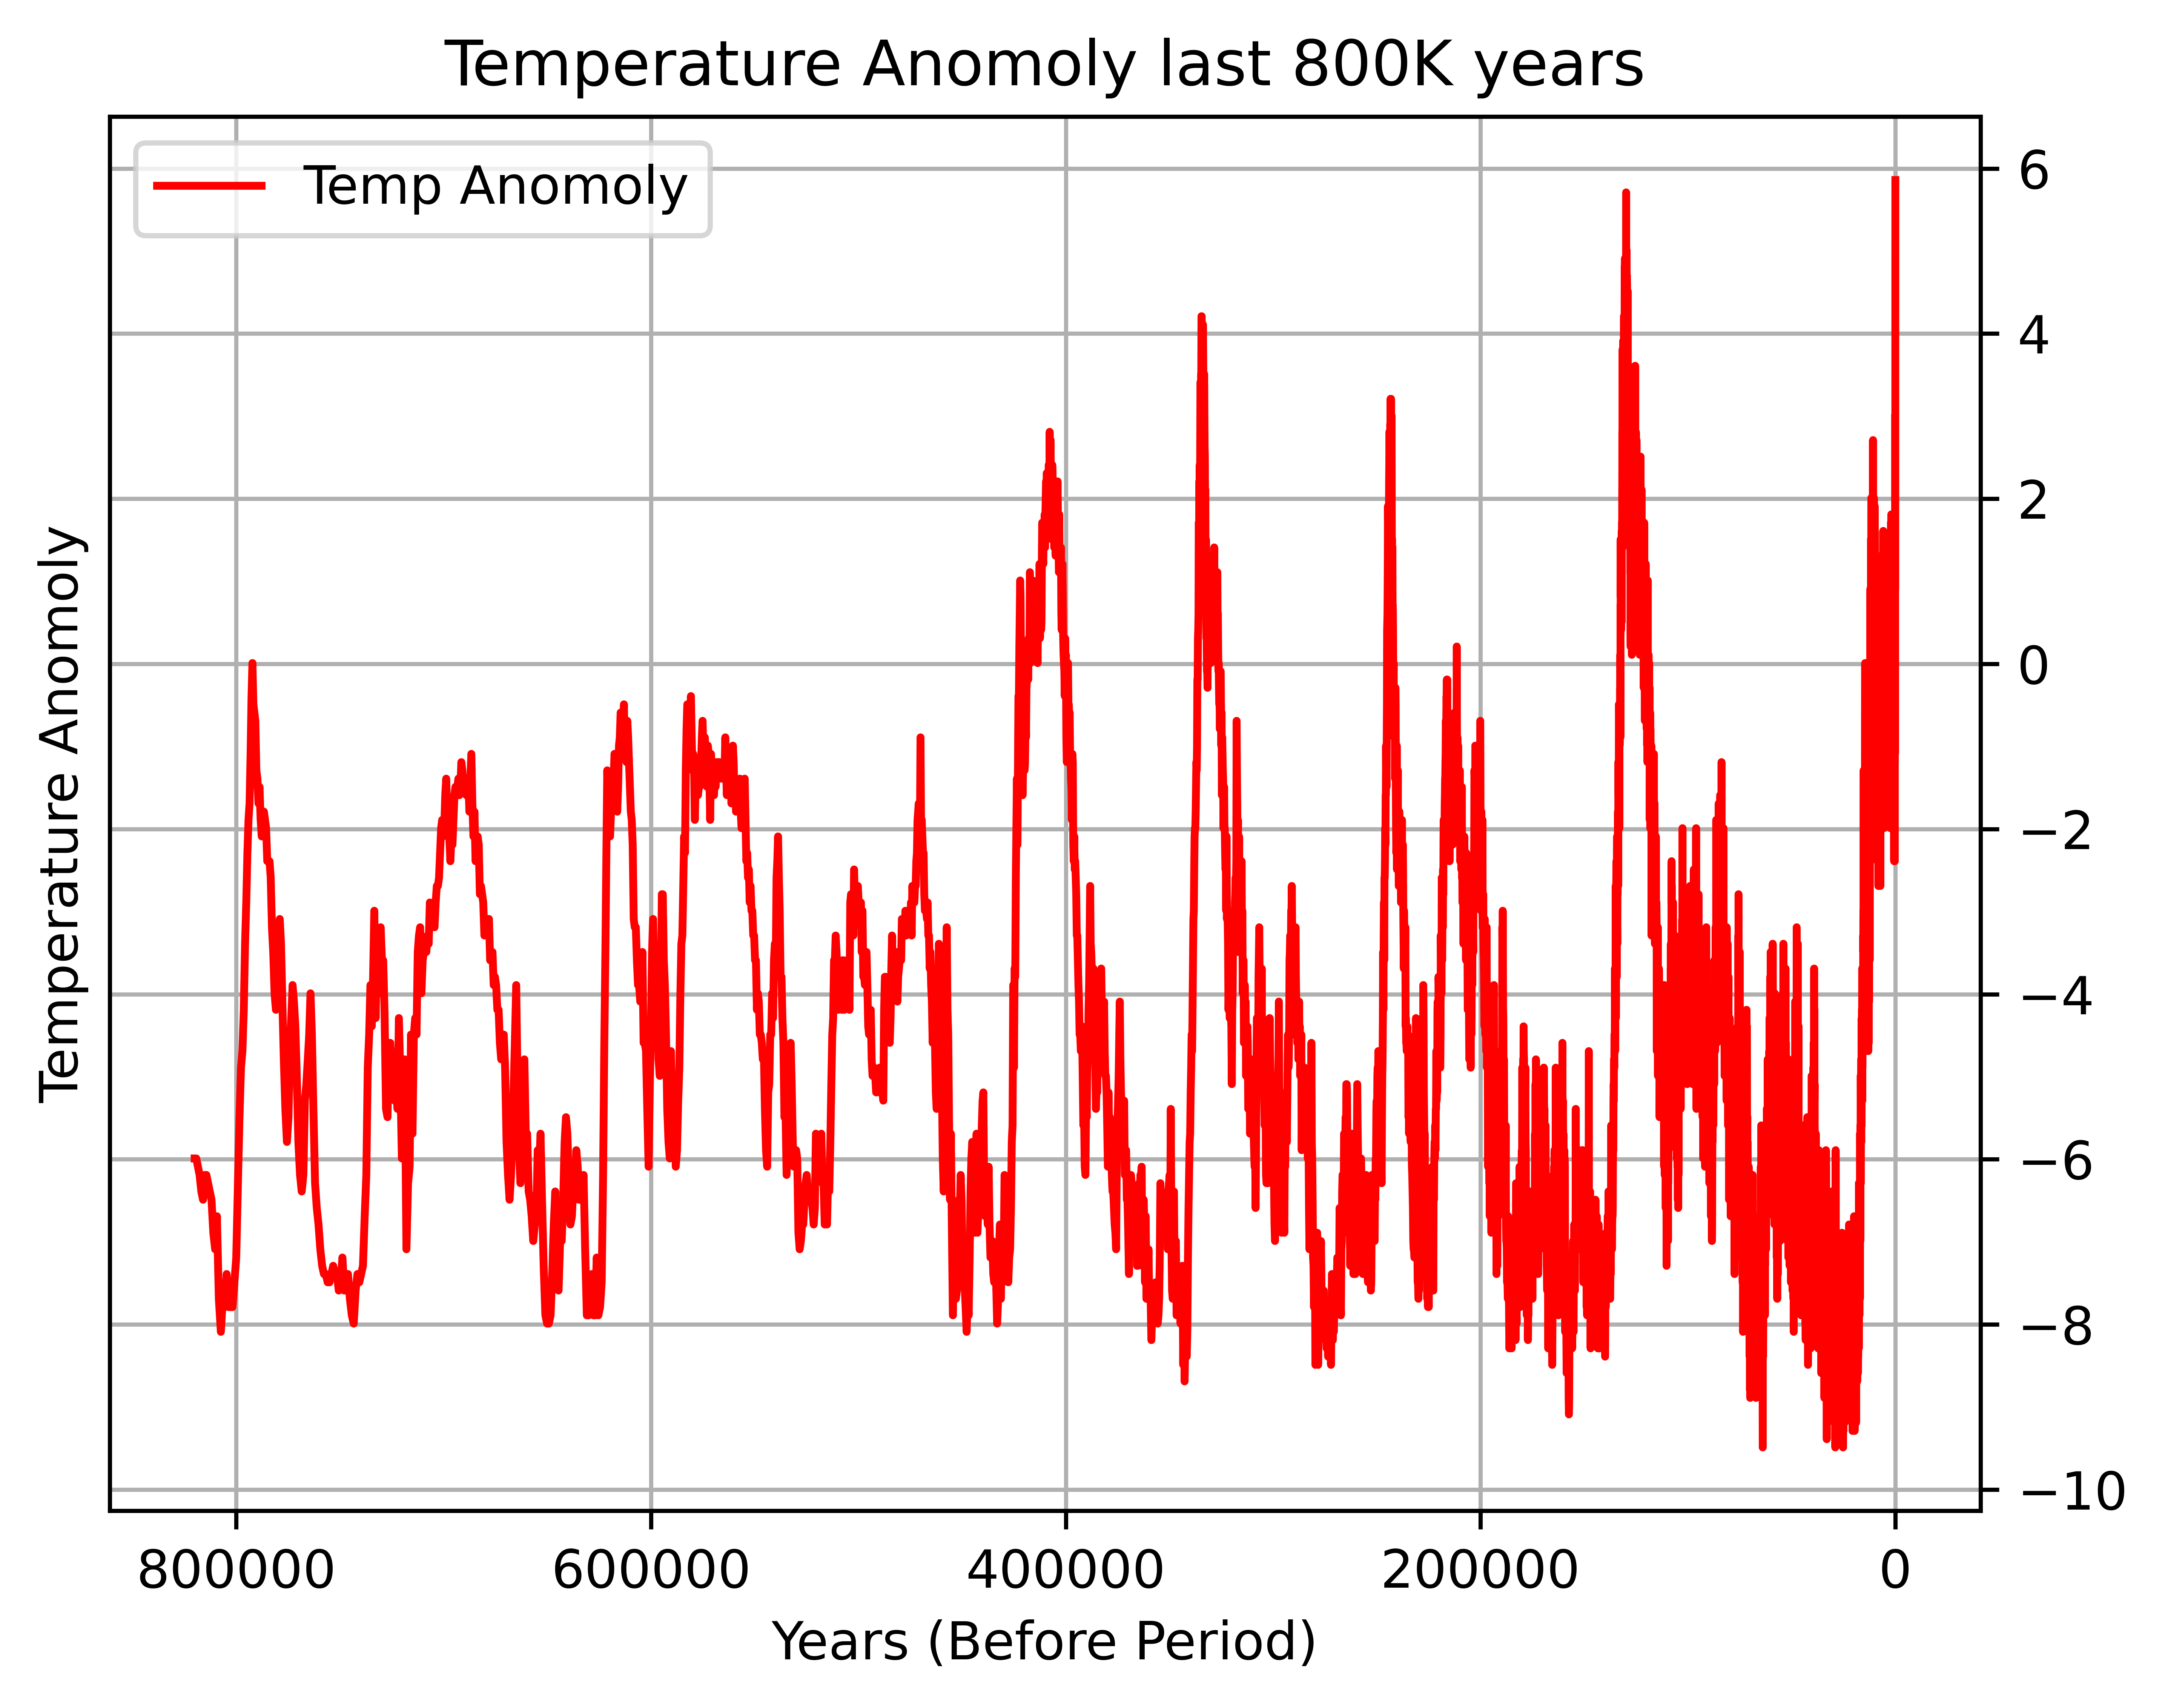

In [218]:
### Read in two datafiles

# Firstly we are going to look at both of the files

# I am going to firstly plot the temperature data

# This is the same as above for the CO2 plot Vs temperature

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

TemperatureData  = pd.read_csv('FinalData/TemperatureAnomoly.csv')

fig, ax = plt.subplots()

# I also want to invert the x-axis

# Years (BP) - Where period is 1950
TemperatureData.plot(x="Year", y="Anomoly", ax=ax, label='Temp Anomoly',color='red')


# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("Temperature Anomoly")
plt.grid(True)
plt.savefig('Images/Temperature Anomoly.png') # Save to PNG file
plt.show()

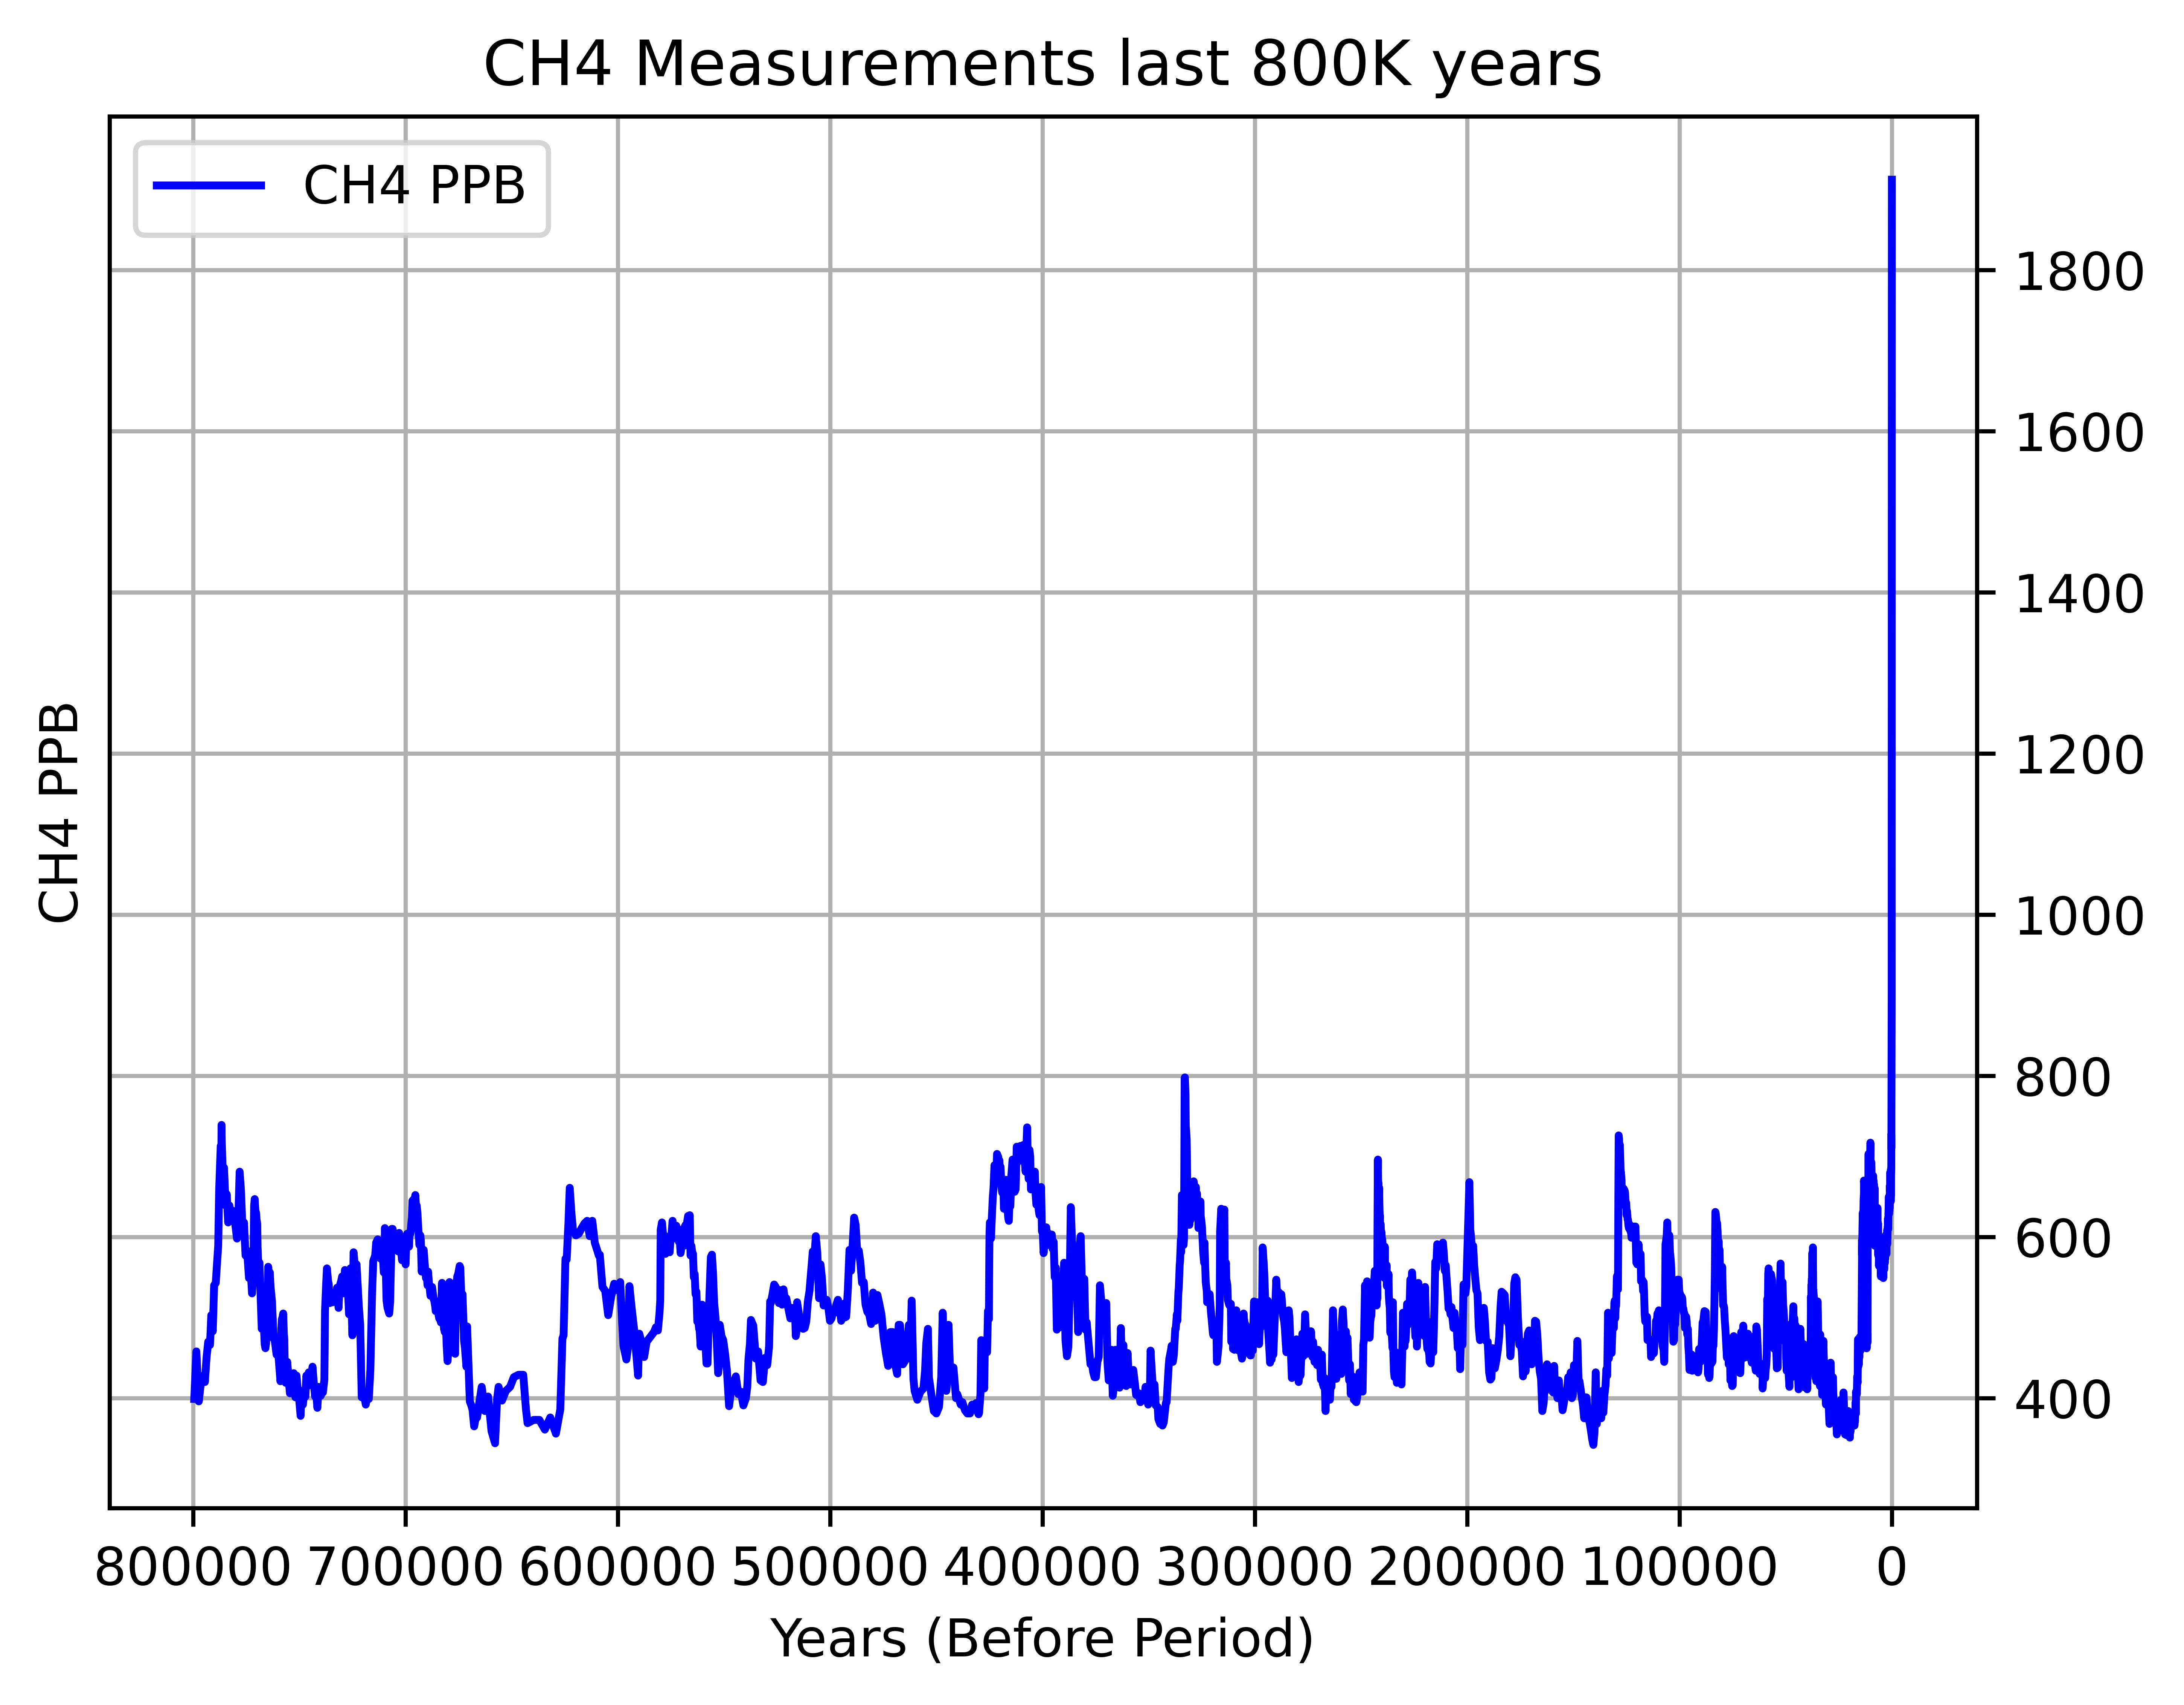

In [219]:
### Read in two datafiles

# Firstly we are going to look at both of the files

# I am going to  plot the CH4 data

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

CH4Data  = pd.read_csv('FinalData/Methane.csv')

fig, ax = plt.subplots()


# I also want to invert the x-axis

# Years (BP) - Where period is 1950

CH4Data.plot(x="GasAge", y="CH4mean", ax=ax, label='CH4 PPB',color='blue')

# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("CH4 Measurements last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("CH4 PPB")
plt.grid(True)
plt.savefig('Images/Methane.png') # Save to PNG file
plt.show()


In [220]:
# Plot both temperature and CH4 on the same plot

import matplotlib.pyplot as plt
# Data points of line 1


Methane = pd.read_csv('FinalData/Methane.csv', header = 0, index_col = 0,
                         parse_dates=True)
Temp = pd.read_csv('FinalData/TemperatureAnomoly.csv', header = 0, index_col = 0,
                       parse_dates=True)

# plot both overlayed
# I also want to invert the x-axis


SummaryTemp = TemperatureData.describe()

print (SummaryTemp) # To get min and max temperature - As I am amalgamating the data from 2000 onwards there is a larger spike or 
# anomoly than expected but the trend is similar to other graphs online in regards to CO2 and temperature. 

SummaryCH4 = CH4Data.describe()

print (SummaryCH4)

ax = Temp.plot(figsize=(10,10))
ax3 = ax.twinx()  
ax3.plot(-9.49,5.86)   # Get minimum and maximum temperature anomoly  - Ranges from -9.49 - 5.86  
ax.invert_xaxis()
plt.title("CH4 Measurements and Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("CH4 PPB")
plt.grid(True)
#ax3.yaxis.tick_right() 
Methane.plot(ax=ax3)
plt.savefig('Images/CH4andTemp.png') # Save to PNG file

                Year      Anomoly
count    5832.000000  5832.000000
mean   191373.269057    -3.895838
std    193444.737289     3.153729
min       -72.000000    -9.490000
25%     47144.965000    -6.490000
50%    123172.800000    -4.490000
75%    276096.950000    -1.390000
max    820093.900000     5.860000
              GasAge      CH4mean
count    2155.000000  2155.000000
mean   264367.100232   547.891606
std    243802.054102   200.229778
min       -72.000000   342.000000
25%     40041.500000   451.000000
50%    217406.000000   513.000000
75%    424312.000000   594.500000
max    799396.000000  1911.830000


### Analysis - CH4 and Temperature

As mentioned previously the Methane or CH4 data has been sourced from three different sources.

1. 800K years - 1937 (Approx). Methane record from the EPICA (European Project for Ice Coring in Antarctica) 
Dome C ice core covering 0 to 800 kyr BP. 

2. 1940 - 1983 - https://www.eea.europa.eu/ - 

3. 1984 - 2022 - gml.noaa.gov/ccgg/trends/ website (Mauna Loa data)

The CH4 data is the average year for the year in question. Even though the data has been taken from 3 different sources the data does not vary hugely between the 3 datasets. (As does my temperature data from the previous analysis on CO2 and temperature - there is a large variance from the year 2000 onwards in temperature anomoly)

The overall analysis of the CH4 and temperature data shows us that the levels of CH4 have been rising consistently over the past 800K years and in conjunction with that the temperature has also been on the rise. There have been 5 or 6 major ice ages since the earths 4.5 billion year history. The dips in the blue line above show us these dips in temperature anomoly. 

It is a known fact that Methane is responsible for around 30% of the rise in global temperatures since the industrial revolution. Rapid and sustained reductions in methane emissions are key to limit near-term warming and improve air quality.

The first Industrial revolution occured between 1760 to 1830. This industrial revolution was mainly confined to Britain. The second industrial revolution occurred in the late 19th and 20th centuries.  Methane (CH4): Human activities increased methane concentrations during most of the 20th century to more than 2.5 times the pre-industrial level, from approximately 722 parts per billion (ppb) in the 18th century to 1,867 ppb in 2019.

If we look at the Methane.csv file we can see that in the 18th century (200BP approx) the mean methane measurement for 202 YBP (1748)  was 696.0 compared to 1911.83 in -72 YBP (2022). This is an increase of 1215.83. This is close to 3 times the pre-industrial average.

The increase from 2020 to 2021 was 17 PPB and this is set to be the largest increase ever recorded.

From the graph around the time of the industrial revolutions we can see there is a steady rise in Methane emissions year on year. There has been no decrease. The industrial revolution meant that there was more burning of oil, natural gas and coal. 

Methane is a potent greenhouse gas. Greenhouses gases act as a blanket insulating the earth, absorbing the energy and slowing the rate as which heat leaves the planet. Therefore the Earth becomes warmer.

It is obvious from the graphs above that there is a strong correlation between the rise of CH4 and the rise in temperature over the past 800K years or so. There has been 5/6 major ice ages and this is obvious too from the dips in temperature and CH4 also.

I am going to discuss the CH4 data and the temperature data under the below headings.

### Temporal Lead and Lag Analysis (Cause and Effect)

Temporal data is data that represents a state in time. Temporal data is collected to analyze environmental variables such as CH4 and temperature changes. Historically, temperature and CH4 have followed similar patterns because the heating or cooling of Earth's surface can lead to changes in the concentrations of greenhouse gases in the atmosphere, which can then cause additional warming or cooling.

Lead and Lag analysis is used to shift one variable ahead or back in time so that the movements of two variables are more closely aligned if there is a time lag between a change in one variable and its impact on another. 

We can see from the graph of the two variables that for the most part they both rise and fall together. Temperature and CH4 are extremely tightly correlated but I do think Methane slighly lags temperature. 


https://www.futurelearn.com/info/courses/introduction-to-climate-justice-and-equity/0/steps/347016#:~:text=Methane%20(CH4)%3A%20Human%20activities,to%201%2C867%20ppb%20in%202019

https://www.iea.org/reports/global-methane-tracker-2022/methane-and-climate-change

https://www.bridgerphotonics.com/blog/how-does-methane-affect-environment#:~:text=Methane%20(CH4)%20is%20the%20main,which%20heat%20leaves%20the%20planet.

Lag Analysis - Using statsmodels ccf() function

In [221]:
# Output Methane data to a list so that I can perform the correlation analysis on between Methane and Temperature

CH4Data1 = CH4Data['CH4mean'].tolist()

print(CH4Data1)

[1911.83, 1895.28, 1878.93, 1866.58, 1857.33, 1849.58, 1843.12, 1834.26, 1822.53, 1813.43, 1808.12, 1803.14, 1798.91, 1793.52, 1787.01, 1781.38, 1774.94, 1774.16, 1777.05, 1777.33, 1772.66, 1771.22, 1773.22, 1772.33, 1765.54, 1754.48, 1751.28, 1748.88, 1742.07, 1736.53, 1735.47, 1724.78, 1714.43, 1704.53, 1693.28, 1682.7, 1670.09, 1657.29, 1644.85, 1617.89, 1600.69, 1566.28, 1549.53, 1532.77, 1483.57, 1403.19, 1328.47, 1262.97, 1207.03, 1161.73, 1128.83, 1102.4, 907.0, 784.0, 762.0, 710.0, 727.0, 696.0, 683.0, 679.0, 676.0, 651.0, 684.0, 681.0, 670.0, 644.0, 670.0, 668.0, 680.0, 667.0, 669.0, 680.0, 643.0, 664.0, 647.0, 648.0, 640.0, 636.0, 635.0, 633.0, 644.0, 643.0, 629.0, 635.0, 635.0, 650.0, 631.0, 638.0, 632.0, 630.0, 610.0, 623.0, 623.0, 615.0, 623.0, 618.0, 613.0, 613.0, 605.0, 599.0, 604.0, 591.0, 594.0, 609.0, 602.0, 597.0, 595.0, 594.0, 597.0, 593.0, 604.0, 592.0, 579.0, 603.0, 590.0, 592.0, 586.0, 590.0, 580.0, 588.0, 583.0, 580.0, 578.0, 577.0, 577.0, 581.0, 573.0, 576.0, 5

In [222]:
# We can calculate the cross correlation for every lag between
# the two time series by using the ccf() function from the statsmodels package as follows:


import statsmodels.api as sm
import seaborn as sns

#calculate cross correlation
test = sm.tsa.stattools.ccf(JouzelTemp, CH4Data1, adjusted=False)

print(test)

# Need to convert the array into a pandas dataframe in order to export to csv file 

dfCH4Tempcorrelation = pd.DataFrame(test)

print(dfCH4Tempcorrelation)

dfCH4Tempcorrelation.to_csv (r'Roughwork_Methane/dfCH4Tempcorrelation.csv', index=None)

#Reference for the statsmordels.api
# https://www.statology.org/cross-correlation-in-python/

NameError: name 'JouzelTemp' is not defined

In [ ]:
# The statsmodels ccf function only produces forward lags, so in order to produce both forward and backward lags 
# is to reverse the order of both the input series and the ouput 

backwards = sm.tsa.stattools.ccf(JouzelTemp[::-1], CH4Data1[::-1], adjusted=False)[::-1]
forwards = sm.tsa.stattools.ccf(JouzelTemp, CH4Data1, adjusted=False)
ccf_output = np.r_[backwards[:-1], forwards]

# Need to convert the array into a pandas dataframe in order to export to csv file 

dfCH4Tempcorrelation = pd.DataFrame(ccf_output)

print(dfCH4Tempcorrelation)

dfCH4Tempcorrelation.to_csv (r'Roughwork_Methane/dfCH4Tempcorrelation.csv', index=None)

# https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library


In [ ]:
import matplotlib.pylab as plt

plt.stem(range(-len(ccf_output)//2, len(ccf_output)//2), ccf_output)
plt.xlabel('Lag')
plt.ylabel('ACF')
# 95% UCL / LCL - Upper Confidence and lower confidence level
plt.axhline(-0.5/np.sqrt(len(test)), color='k', ls='--') 
plt.axhline(0.5/np.sqrt(len(test)), color='k', ls='--')

In [ ]:
# Another way of plotting the lag is below

full = (pd.DataFrame({'value':np.concatenate([backwards, forwards[1:]])})
          .assign(lag=lambda x: x.index - len(backwards) )
       )

full.plot(x='lag')

# https://stackoverflow.com/questions/69968668/cross-correlation-plot-in-statsmodels

### Interpretation of Cross Correlation between CH4 and Temperature

What Is Considered a Strong Correlation Coefficient?

Generally, the closer a correlation coefficient is to 1.0 (or -1.0) the stronger the relationship between the two variables is said to be. While there is no clear boundary to what makes a "strong" correlation, a coefficient above 0.75 (or below -0.75) is considered a high degree of correlation, while one between -0.3 and 0.3 is a sign of weak or no correlation. 

To simply explain the two plots above. Cross-correlation is a measure of similarity of two series as a function of the displacement of one relative to the other. https://en.wikipedia.org/wiki/Cross-correlation

 The coefficient values on the left of zero are those where X leads and Y lags while the ones on the right are when Y leads and X lags. (at Lag 0)
 

The highest positive correlation coefficient (the point at which the plot touches the dashed horizontal blue line) is +0.5. From the graph above it looks like this happened at the -5 lag, which is equivalent to lagging variable X 5 years behind Y.  To interpret this, we would say there is a weak positive correlation between the rise in Methane and the rise in temperature 5 years later.

https://www.datainsightonline.com/post/cross-correlation-with-two-time-series-in-python#:~:text=Interpretation%20and%20Further%20Steps&text=The%20coefficient%20values%20on%20the,blue%20line)%20is%20%2B0.32